# Notebook for running MLR  on Ireland (CER) data  - all aggregation levels       

## Note: Most of the final analysis and comparions (with ANN, LCL etc) are done in LCL_ANN_Main notebook 

 New config - all functions moved to a separate module 

In [1]:
# import  module containing all my functions 
import mscprojectcoding.FM_MScProject_LoadForecasting_Module as FMmodule


In [2]:
# force reimport of module after edits/updates to functions in PyCharm 
import importlib
importlib.reload(FMmodule)

<module 'mscprojectcoding.FM_MScProject_LoadForecasting_Module' from 'c:\\users\\fmurphy\\onedrive - loughborough university\\fm-project\\mscprojectcoding\\src\\mscprojectcoding\\FM_MScProject_LoadForecasting_Module.py'>

In [318]:
# import ALL functions 
# updated 7/Sep - now imports EVERY function in module here - regardless if used in this notebook or not..

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlot                              # plots ANN model forecast for specified windows 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlotInputs                        # shift train&test forecasts to align with hr/day indices ie unpack into actual time bands - similar to shiftInputs but returns dictionary of np arrays for test AND train wondows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  boxplotLoad                          # box plot of load distribution by hour of day etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_MLP                           # create MLP for ANN
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_save_folder                   # create folder name for saving results
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df               # split Train and Test data into dfs for ANN - standard version
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df_V2            # split Train and Test data into dfs for ANN - version with day of week classifier scaling
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredictSeries            # split Train and Test numpy arrays for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  cv_calc                              # Error calculation - coeff of variance error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  diff_datetime                        # Function to calculate time difference between two datetime objects.
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  findkeys                             # get all keys and subkeys of nested dictionary 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  flip_dictionary                      # invert dictionary nest levels for plotting results (MLR and/or ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  fullprint                            # change num lines to print of a numpy array without changing default
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_data_range                       # get range of data for each groupby block
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_error_percentiles                # get specified percentiles from error dictionary (MLR, ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errorDictionary                  # load error dictionary from disk given path name
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errors                           # compute errors for supplied models, hardwired for MAPE,MAE,CV,RMSE,NRMSE errors
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_limits                           # get x,y limits for plot axis
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_MLRerrorDictionary               #  get MLR error dictionaries from specified folder
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NaN_stats                        # get stats for NaNs in each column
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NPminmax_values                  # get max value in each col OR full np array
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_save_folderName                  # generate folder name for saving results files
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_TrainTestSeries                  # for ANN inputs ?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_uniques                          # get unique values from dataframe columns or pd.series?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getForecastByGrp                     # get forecast for given ggregation grp
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getForecastByGrpName                 # simplified version of getForecastByGrp - this one gets a specific forecast for a supplied grp name instead of random set of grps
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getLoadByGrp                         # function to get agg load and errors by (aggregation) group
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getRowN_of_uID                       # search to find ordinal row number of data series for specified uID(s)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getTrainTestSeriesNames              # generate list of train, test series names from eg loadSeries, envSeries dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  historyPlot                          # plots loss function from ANN MLP history object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  lrmodel_r2                           # Function to calculate linear regression and R2
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mae_calc                             # Error calculation - mean avg error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mape_calc                            # Error calculation - Mean avg percentage error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  merge_TrainTestErrors                # merge ANN error dictionaries from TRAIN and TEST windows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_predict                          # returns forecast given MLR regression model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_train                            # returns MLR regression model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calc                           # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calcV2                         # FUNCTION TO CALULATE range normalised  RMSE using method of Humeau et al 2013 (normalize using L2 norm of series)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  peristModelPlot                      # plot persistence model series
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataArrayVersion2             # Splice out a) xs series b) ys series from load data series  and create 2-row output numpy array for input to persistance model plot function
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataWindowed                  # generates persistence models with variable window size search
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistScatterPlot                   # plot peristance models 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  piecewise_linear                     # comput piecewise linear function given slopes, intercept etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_allFeatures                     # plot selected columns of numpy array 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_errors                          # plot avg errors from errors dictionary (eg for all MLR models)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_forecast                        # plot forecast for specified tiime periods (MLR only?)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_percentileTraces                # plot percentile traces extracted from percentile dictionaries created from e.g. ANN and MLR errro dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  PlotLoadByDaysOfWeek                 #  plot load (eg aggregate) np array by weekday/sat/sun and hr of day
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plotSectionOfLoadProf                # plot window of load profile given start index, smpls per day, number of days etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  pltDefaults                          # set rc params (matplotlib) plot defaults
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  populate_AllFeatures                 # populate numpy array for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_get                               # persistence model r2 calculations
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogram                         # plotting of r2 histogram for variable window search persistence model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogramV2                       # similar but tailored for publication plots (most series greyed out)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2RegPlot                            # Function to CALC and ADD R2 regression LINE to existing subplot (axes) object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroupAggregate             # form group aggregate load df for random userD grps created by randomUserGroups
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroups                     # form random userID clusters of size N  
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  removeNestings                       # flatten a dictionary
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  rmse_calc                            # Error calculation - root mean sq error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_down                           # round a number down to nearest decade (0.1,1,10,100 etc) 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_up                             # round a number up to nearest decade (0.1,1,10,100 etc)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  saveAnnConfigXresults                # define function to save all ANN results (dictionaries, etc)  to disk
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  saveMLRconfigXresults                 # define function to save all MLR results  (dictionaries, etc)  to disk
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_ErrorsAllModels                  # boxplot of all model error distribution by aggregation level
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors                       # plot MLR,ANN model errors as boxplot, swarm plot - V1 : plot for various error types - ordered by error type , not model type
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors_V2                    # plot MLR,ANN model errors as boxplot, swarm plot - V2 : Version 2 :plots one error type with subplot for each model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_dowSeries                        # set day of week classifier channels given a dayOfWeek classifier list
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_envSeries                        # set environment series to be used in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_loadSeries                       # select which load series to use in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  setColMap                            # set color map from colmap name and value range
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  shiftInputs                          # shift models/forecast series to align with hr/day indices of load ie unpack into actual time bands
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  show_mem_usage                       # shows total memory usage
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  stackplot_of_forecast                # plots time window of all passed model forecasts,loads - load profiles stacked by calendar day


In [4]:
# get list of all functions in module
#dir(FMmodule)

In [5]:
# import standard packages /modules etc : may not need all these..

import matplotlib.pyplot as plt     # pyplot = collection of command style functions that make matplotlib work like MATLAB, uses numpy arrays internally
import matplotlib.colors as colors2  # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.cm as cmx         # built-in colour maps and utilities; Any colormap can be reversed by appending '_r', so 'RdYlGn_r' is the reversed Red-Yellow-Green colormap
import matplotlib.mlab as mlab      # matlab compatible cmd names
import matplotlib.ticker as mtick   # configurable tick locating and formatting, used by Axis class
import matplotlib.dates as mdates    # useful for getting tick label as siimple dates

import matplotlib.patches as mpatches  # draw geometric shapes 
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines      # 2D lines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,MaxNLocator) # needed for eg integer tick marks etc

import seaborn as sns                  # data visualization library based on matplotlib             

%matplotlib inline

import math                            # module provides access to the mathematical functions defined by the C standard
import csv
import sys
import pandas as pd
import numpy as np
import time                 
import re                              # provides regular expression matching operations 
import random
import os

from six.moves import cPickle as pickle   # cPickle is faster as written in C but merged with Pickle in Python 3.x ..

import numpy.polynomial.polynomial as poly  # polynomial functions incl fitting , etc

from sklearn.cluster import KMeans    # Sklearn = SciPy ML toolkit 
from sklearn import linear_model            # Estimated coefficients for linear regression
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scipy.interpolate import interp1d      # Interpolate a 1-D function.
from scipy.spatial.distance import cdist, pdist       # Pairwise distances between observations in n-dimensional space.
from scipy.spatial.distance import squareform         # Convert a vector-form distance vector to a square-form distance matrix, and vice-versa
from scipy.cluster.hierarchy import dendrogram, linkage   # hierarchical/agglomerative clustering 
from scipy.cluster.hierarchy import fcluster              # Form flat clusters from the hierarchical clustering
from scipy import stats                                   # statistical functions https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize             # commonly used optimization algorithms eg least squares minimization, curve fitting , etc

import json
from datetime import datetime, timedelta 

from itertools import chain           # for iterating through list (of lists) of dictionaries etc
from pathlib import Path              # file/folder paths etc

import requests                              # url requests
from plot_keras_history import plot_history

import importlib

In [6]:
# conda install -n fm_ANN tensorflow  keras (i.e. install into my python3.6 env)

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, LSTM  #Dropout, Flatten, Conv2D, MaxPPooling2D, etc
from sklearn.preprocessing import MinMaxScaler

from keras.utils.vis_utils import plot_model
import pydot 

#warnings because my numpy is 1.18 (ignore for now as don't want to downgrade to 1.16)

C:\Users\fmurphy\Miniconda3\envs\fm_ANN\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fmurphy\Miniconda3\envs\fm_ANN\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fmurphy\Miniconda3\envs\fm_ANN\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fmurphy\Miniconda3\envs\fm_ANN\lib\site-packages\ten

In [7]:
#set matplotlib defaults
#https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

#mpl.rc('lines', linewidth=2, color='r')
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

mpl.rcParams['text.usetex'] = True

matplotlib.matplotlib_fname()

'C:\\Users\\fmurphy\\Miniconda3\\envs\\fm_ANN\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [8]:
# SET SEABORN DEFAULTS

# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.set_style.html
# https://matplotlib.org/tutorials/introductory/customizing.html

#sns.set_style() # (style=None, rc=None) Set the aesthetic style of the plots. 
sns.set_style(style="whitegrid",
              rc= 
             {'axes.linewidth': 1, 
               'axes.edgecolor':'black', 
               'xtick.direction': 'out',
               'xtick.major.size': 4.0, 
               'ytick.direction': 'out', 
               'ytick.major.size': 4.0, 
               'axes.facecolor': 'white',
               'grid.color': '.8', 
               'grid.linestyle': u'-', 
               'xtick.minor.size': 3.0, 
               'ytick.minor.size': 3.0, 
               'grid.linewidth': 0.})        
sns.axes_style()                  # returns current settings (default axes styles)

plt.style.use('seaborn')     # switch to seaborn style
# plot code
# ...

plt.style.use('default')     # switches back to default matplotlib style
# plot code
# ...

# to see all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [9]:
# to avoid warning message 
#C:\Users\fmurphy\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
# override some default print parameters
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth',-1)

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=2000)
np.set_printoptions(edgeitems=10)


In [11]:
# load hourly load data 
hourly_df = pd.read_pickle('../project_data/intermediateDataIreland/CER_Data_Step6.hourly_df.pkl')
hourly_df

2010-01-01 00:00:00  2010-01-01 01:00:00  2010-01-01 02:00:00  \
user_id                                                                  
1002                  0.2340               0.0865               0.0555   
1014                  1.5060               0.7825               0.6985   
1018                  0.4710               0.4655               0.4515   
1022                  0.1980               0.2035               0.1405   
1027                  0.1115               0.0525               0.0370   
...                      ...                  ...                  ...   
7428                  0.3580               0.2915               0.1065   
7432                  0.5645               0.4420               0.2525   
7436                  0.4020               0.1325               0.1145   
7437                  0.2220               0.1255               0.1270   
7441                  0.0000               0.2345               0.2990   

         2010-01-01 03:00:00  2010-01-01 04:00:00  2010-01-01 05:00:00  \
user_id                                                                  
1002                  0.1055               0.0915               0.0480   
1014                  0.7385               0.6385               0.7615   
1018                  0.4640               0.4750               0.4730   
1022                  0.1280               0.1340               0.1155   
1027                  0.0370               0.0365               0.0370   
...                      ...                  ...                  ...   
7428                  0.1325               0.1275               0.1045   
7432                  0.2080               0.2065               0.1735   
7436                  0.1375               0.1295               0.1095   
7437                  0.2290               0.1460               0.1275   
7441                  0.1795               0.1150               0.0865   

         2010-01-01 06:00:00  2010-01-01 07:00:00  2010-01-01 08:00:00  \
user_id                                                                  
1002                  0.1230               0.1060               0.2745   
1014                  0.6845               0.7650               2.5470   
1018                  0.4830               0.7165               0.7205   
1022                  0.0505               0.0395               0.0515   
1027                  0.0365               0.0370               0.0915   
...                      ...                  ...                  ...   
7428                  0.1170               0.1780               0.1500   
7432                  0.1315               0.1305               0.1320   
7436                  0.1190               0.1280               0.1295   
7437                  0.1775               0.2595               0.1750   
7441                  0.2240               0.6980               0.6975   

         2010-01-01 09:00:00  2010-01-01 10:00:00  2010-01-01 11:00:00  \
user_id                                                                  
1002                  0.4495               0.9495               0.3070   
1014                  1.0510               0.8420               0.1475   
1018                  0.8405               2.0985               1.5795   
1022                  0.0350               0.1445               0.1055   
1027                  0.0360               0.5180               0.5180   
...                      ...                  ...                  ...   
7428                  0.1290               0.3810               0.1925   
7432                  0.1920               0.2050               0.7595   
7436                  0.1135               0.1265               0.1205   
7437                  0.1260               0.1750               0.2325   
7441                  0.4935               0.5500               0.6200   

         2010-01-01 12:00:00  2010-01-01 13:00:00  2010-01-01 14:00:00  \
user_id                                                                  
1002     

data base cleaning

In [12]:
# 1) exclude anomalously low usage users 

cutoff = 1000  # see CER histograms of annual aggregate consumption by user
lowLoadUsers_df = hourly_df.loc[(hourly_df.sum(axis=1).values < cutoff)]  
print("Number of users with annual aggregate usage < ",cutoff," kWh is : ",lowLoadUsers_df.shape[0])

agg_lowLoadUsers = lowLoadUsers_df.sum(axis=0)    # sum each column ie aggregate of all users in input df
uIDsReject = lowLoadUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs

uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

Number of users with annual aggregate usage <  1000  kWh is :  24
# users retained: 754


In [13]:
# 2) also exlude users with large number of 0 readings
zeroReadingsCutoff = 10

ZeroReadingsUsers_df = hourly_df.loc[hourly_df[hourly_df == 0.000].count(axis=1)>zeroReadingsCutoff]
print("Number of users with > {0} zero value hr readings is {1}".format(zeroReadingsCutoff,ZeroReadingsUsers_df.shape[0]))

uIDsReject = ZeroReadingsUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs
uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

Number of users with > 10 zero value hr readings is 79
# users retained: 675


# skip down to "Restart here"
# experimenting - looking at users with near 0 consumption values    
warning: some of plots and print outs are v big and slow down notebook respone !

In [14]:
hourly_df.head()
#df['mean'] = df.mean(axis=1)

2010-01-01 00:00:00  2010-01-01 01:00:00  2010-01-01 02:00:00  \
user_id                                                                  
1002                  0.2340               0.0865               0.0555   
1014                  1.5060               0.7825               0.6985   
1018                  0.4710               0.4655               0.4515   
1022                  0.1980               0.2035               0.1405   
1027                  0.1115               0.0525               0.0370   

         2010-01-01 03:00:00  2010-01-01 04:00:00  2010-01-01 05:00:00  \
user_id                                                                  
1002                  0.1055               0.0915               0.0480   
1014                  0.7385               0.6385               0.7615   
1018                  0.4640               0.4750               0.4730   
1022                  0.1280               0.1340               0.1155   
1027                  0.0370               0.0365               0.0370   

         2010-01-01 06:00:00  2010-01-01 07:00:00  2010-01-01 08:00:00  \
user_id                                                                  
1002                  0.1230               0.1060               0.2745   
1014                  0.6845               0.7650               2.5470   
1018                  0.4830               0.7165               0.7205   
1022                  0.0505               0.0395               0.0515   
1027                  0.0365               0.0370               0.0915   

         2010-01-01 09:00:00  2010-01-01 10:00:00  2010-01-01 11:00:00  \
user_id                                                                  
1002                  0.4495               0.9495               0.3070   
1014                  1.0510               0.8420               0.1475   
1018                  0.8405               2.0985               1.5795   
1022                  0.0350               0.1445               0.1055   
1027                  0.0360               0.5180               0.5180   

         2010-01-01 12:00:00  2010-01-01 13:00:00  2010-01-01 14:00:00  \
user_id                                                                  
1002                  0.4260               0.2205               0.2310   
1014                  0.1360               0.2625               0.8400   
1018                  0.8235               1.6530               0.9420   
1022                  0.0430               0.0515               0.0345   
1027                  0.0920               0.3835               0.6925   

         2010-01-01 15:00:00  2010-01-01 16:00:00  2010-01-01 17:00:00  \
user_id                                                                  
1002                  0.3715               0.3215               0.4570   
1014                  0.5595               0.8085               0.7635   
1018                  2.6380               1.3610               1.3310   
1022                  0.0490               0.0340               0.0405   
1027                  0.2415               0.6155               2.8295   

         2010-01-01 18:00:00  2010-01-01 19:00:00  2010-01-01 20:00:00  \
user_id                                                                  
1002                  0.2980               0.1630               0.1360   
1014                  1.6020               1.2985               1.9905   
1018                  1.5805               1.5385               1.4420   
1022                  0.0720               0.1025               0.1215   
1027                  1.2310               0.3515               0.3955   

         2010-01-01 21:00:00  2010-01-01 22:00:00  2010-01-01 23:00:00  \
user_id                                                                  
1002                  0.1970                0.159               0.1485   
1014                  1.6510                1.294               0.8540   
1018                  1.3475                1.576               1.3225   
1022  

In [15]:

cutoff=0.001
df1=hourly_df.loc[hourly_df[hourly_df <= cutoff].count(axis=1)>0]     # get users where at least one hourly reading < cutoff
df1.mean(axis=1).sort_values(ascending=True).describe(percentiles=[.01,.10, .5, .90,.99])
#df1[df1.mean(axis=1)<0.2]                                             # of thse, select users where mean annual hourly consumption < 0.2 kWh


count    299.000000
mean       0.525245
std        0.244991
min        0.120796
1%         0.152343
10%        0.246072
50%        0.472510
90%        0.841496
99%        1.182026
max        1.399084
dtype: float64

In [16]:
hourly_df.mean(axis=1).describe(percentiles=[.01,.10, .5, .90,.99])

count    675.000000
mean       0.506084
std        0.249700
min        0.118190
1%         0.143496
10%        0.227984
50%        0.462192
90%        0.821445
99%        1.253053
max        2.209470
dtype: float64

based on above, mean hourly consumption = 0.50 kWh so use 1% of this as cutoff for MAPE error denominator ie 0.005

In [84]:
# get indices of values < cutoff
cols = df1.columns
bt = df1.apply(lambda x: x <= cutoff)  # df of true/false
list1=bt.apply(lambda x: list(cols[x]), axis=1)   #extract col name (datetime) for TRUE readings on each row

for row in list1:
    r=[]
    for item in row:
        r.append([item.dayofyear,item.hour])
    print(r)

[[195, 13]]
[[342, 17], [342, 18]]
[[321, 22], [321, 23]]
[[314, 10], [324, 0]]
[[38, 15], [167, 10]]
[[260, 21], [260, 22]]
[[13, 13], [279, 10], [279, 11], [285, 20], [285, 21]]
[[206, 10], [206, 11], [206, 12], [206, 13]]
[[99, 15], [99, 16]]
[[195, 13]]
[[165, 14]]
[[22, 11], [22, 12], [301, 10], [301, 11], [301, 12], [301, 13], [301, 14], [301, 15]]
[[191, 6], [194, 7], [254, 16]]
[[43, 10], [43, 11], [43, 12], [43, 13], [43, 14], [43, 15], [43, 16]]
[[365, 16], [365, 17], [365, 18], [365, 19], [365, 20], [365, 21], [365, 22], [365, 23]]
[[90, 18], [90, 19]]
[[287, 12]]
[[14, 14], [207, 21], [207, 22], [207, 23], [208, 0], [332, 11], [332, 12], [332, 13], [332, 14], [332, 15]]
[[234, 13], [234, 14], [237, 10], [237, 11], [237, 12], [237, 13], [237, 14], [237, 15], [237, 16]]
[[252, 12]]
[[61, 13], [61, 14], [61, 15], [61, 16]]
[[13, 11], [13, 12], [13, 13], [13, 14]]
[[1, 1], [321, 21]]
[[195, 8], [195, 9], [195, 10]]
[[143, 22]]
[[212, 11], [212, 12]]
[[50, 11], [50, 12], [50, 13

In [85]:
#get stats of df for each colun (hr)
table1=hourly_df.describe(percentiles=[.10, .5, .90])
table1

2010-01-01 00:00:00  2010-01-01 01:00:00  2010-01-01 02:00:00  \
count           675.000000           675.000000           675.000000   
mean              0.614279             0.422281             0.320711   
std               0.756276             0.631951             0.603214   
min               0.000000             0.000000             0.000000   
10%               0.085700             0.059500             0.055000   
50%               0.403500             0.246500             0.177000   
90%               1.391300             0.997000             0.651300   
max              11.193500            11.583000            12.058000   

       2010-01-01 03:00:00  2010-01-01 04:00:00  2010-01-01 05:00:00  \
count           675.000000           675.000000           675.000000   
mean              0.274197             0.255062             0.241381   
std               0.600256             0.562222             0.513224   
min               0.000000             0.000000             0.000000   
10%               0.046500             0.048000             0.043500   
50%               0.154000             0.147500             0.141000   
90%               0.508400             0.464800             0.447500   
max              12.258500            11.923000            10.555000   

       2010-01-01 06:00:00  2010-01-01 07:00:00  2010-01-01 08:00:00  \
count           675.000000           675.000000           675.000000   
mean              0.239942             0.288805             0.365749   
std               0.440832             0.492540             0.486209   
min               0.000000             0.000000             0.000000   
10%               0.044700             0.055200             0.062400   
50%               0.147500             0.178000             0.212500   
90%               0.430300             0.551700             0.794900   
max               8.397000             9.017000             5.552000   

       2010-01-01 09:00:00  2010-01-01 10:00:00  2010-01-01 11:00:00  \
count           675.000000           675.000000           675.000000   
mean              0.481127             0.604222             0.691427   
std               0.566856             0.653197             0.760565   
min               0.000000             0.004000             0.002000   
10%               0.065000             0.089000             0.083200   
50%               0.297500             0.377500             0.416000   
90%               1.152400             1.490100             1.765400   
max               4.305000             4.638000             5.439500   

       2010-01-01 12:00:00  2010-01-01 13:00:00  2010-01-01 14:00:00  \
count           675.000000           675.000000           675.000000   
mean              0.781163             0.818219             0.765475   
std               0.839735             0.892455             0.870848   
min               0.000000             0.005000             0.005000   
10%               0.089500             0.084700             0.080900   
50%               0.459000             0.464000             0.449500   
90%               1.909000             1.988600             1.907200   
max               4.785000             6.135500             6.126000   

       2010-01-01 15:00:00  2010-01-01 16:00:00  2010-01-01 17:00:00  \
count           675.000000           675.000000           675.000000   
mean              0.793648             0.841901             1.107913   
std               0.939950             0.888434             1.064090   
min               0.004000             0.004000             0.007000   
10%               0.082500             0.096000             0.129700   
50%               0.432500             0.497500             0.763000   
90%               2.032100             2.092200             2.537200   
max               7.376500             5.662500             7.102000   

       2010-01-01 18:00:00  2010-01-01 19:00:00  2010-01-01 20:00:00  \
count           675.000000           675.

In [86]:
table2=table1.loc[['mean','10%','90%']]
table2.index

Index(['mean', '10%', '90%'], dtype='object')

In [ ]:
np.arange(table2.shape[1])
row
table2.loc[row]

In [ ]:
fig = plt.figure(figsize=(30,15*numPlots))
axs = fig.add_subplot(111)
colors=['k','r','b']
for i,row in enumerate(table2.index):
    axs.plot(np.arange(table2.shape[1]),table2.loc[row].values,label=row,color=colors[i])
axs.set_ylabel('kWh',fontsize=12)
axs.grid(b=True)
axs.set_ylim(0,1)
    

In [ ]:
#table1.plot(figsize=(15,6),legend=True,use_index=False) #,ylim=(0,1))

# Restart here

In [14]:
aggLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time 
aggLoad

2010-01-01 00:00:00    414.6385
2010-01-01 01:00:00    285.0400
2010-01-01 02:00:00    216.4800
2010-01-01 03:00:00    185.0830
2010-01-01 04:00:00    172.1670
                         ...   
2010-12-31 19:00:00    723.4070
2010-12-31 20:00:00    649.0200
2010-12-31 21:00:00    611.5260
2010-12-31 22:00:00    571.6230
2010-12-31 23:00:00    491.5995
Length: 8760, dtype: float64

In [15]:
# daily load aggregate
aggLoadDaily = pd.DataFrame(aggLoad.values.reshape(365,24)).sum(axis=1)
#aggLoadDaily

In [16]:
# get weather and daylight data
hourlyTemp = pd.read_csv('../project_data/intermediateDataIreland/Dublin_Temperature.csv')['temperature']
hourlySunset = pd.read_csv('../project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')['sunset']
hourlyDayLight = pd.read_csv('../project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')['dayLight']
hourlyTemp

0       0.26
1      -0.95
2      -2.07
3      -2.97
4      -2.23
        ... 
8755    6.23
8756    6.10
8757    6.20
8758    5.30
8759    5.99
Name: temperature, Length: 8760, dtype: float64

In [17]:
# daylight saving start/emd dates
dst_dates=[pd.date_range('28/3/2013', '31/10/2013', freq='1D')[0],\
    pd.date_range('28/3/2013', '31/10/2013', freq='1D')[-1]]
dst_dates

[Timestamp('2013-03-28 00:00:00', freq='D'),
 Timestamp('2013-10-31 00:00:00', freq='D')]

In [18]:
# set up any inputs may need
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
indexVals = aggLoad.index    # index = hr in datetime64ns format  (8760 values)

# set date window of interest
start='1/1/2010'
end='1/1/2011'

# create date df from start to end date
colsD = pd.date_range(start, end, freq='1D')[0:-1]  # returns DatetimeIndex
dates = colsD.date # np array

# create hr df from start to end date
colsT = pd.date_range(start, end, freq='1H')[0:-1]  # returns DatetimeIndex
hours = colsT.hour # np array



*skip this next cell    
unless running for first time  - instead read from csv above already*

In [101]:
# get length of day for central London : 51.50° N, 0.125° W
# https://astral.readthedocs.io/en/latest/index.html

from astral import LocationInfo                       # for sunrise and sunset 
from astral.sun import sun  
import pytz
from pytz import timezone

#Location of Dublin (Phoenix Park)
latitude = 53.360001
longitude = -6.325000

city = LocationInfo("Dublin", "Ireland", "Europe/London", latitude, longitude)

print((
f"Information for {city.name}/{city.region}\n"
f"Timezone: {city.timezone}\n"
f"Latitude: {city.latitude:.02f}; Longitude: {city.longitude:.02f}\n"
))

j=0
hourlyDayLight = np.zeros(len(hours))   # nparray  to hold legth of daylight , etc
hourlySunset = np.zeros(len(hours))
hourOfYear = np.zeros(len(hours))
dayLight = sunset = np.zeros(sum(daynum))

df_LoD = pd.DataFrame()

for j,ind in enumerate(dates):  
    date=colsD[j].date()
    # adding the tzinfo bit in next line was the KEY step to get DST in curve 
    s = sun(city.observer, date,tzinfo=city.timezone) 
    dayLight[j] = (s["dusk"]-s["dawn"]).seconds/3600
    sunset[j] = s["sunset"].hour + (s["sunset"].minute)/60 + (s["sunset"].second)/3600   # get sunset as decimal TZ(UTC) hr
    for k in range(24):
        hr = (j*24)+k
        hourOfYear[hr] = hr
        hourlyDayLight[hr] = (s["dusk"]-s["dawn"]).seconds/3600
        hourlySunset[hr] = s["sunset"].hour + (s["sunset"].minute)/60 + (s["sunset"].second)/3600   # get sunset as decimal TZ(UTC) hr
    #if j%30 == 0:
    #    print(f'Date: {date}',f'Dawn: {s["dawn"]} ',f'Dusk: {s["dusk"]}',f'Sunset:{s["sunset"]}')  

print("Lengths: hourOfYear {0}, hourlyDayLight {1}, hourlySunset {2}".format(len(hourOfYear),len(hourlyDayLight),len(hourlySunset)))
df_LoD = pd.DataFrame({'hourOfYear':hourOfYear,'dayLight':hourlyDayLight,'sunset':hourlySunset},\
                      columns=['hourOfYear','dayLight','sunset'])

#df_LoD.to_csv('../project_data/intermediateDataIreland/Dublin_LengthOfDayData.csv')  
    

Information for Dublin/Ireland
Timezone: Europe/London
Latitude: 53.36; Longitude: -6.33

Lengths: hourOfYear 8760, hourlyDayLight 8760, hourlySunset 8760


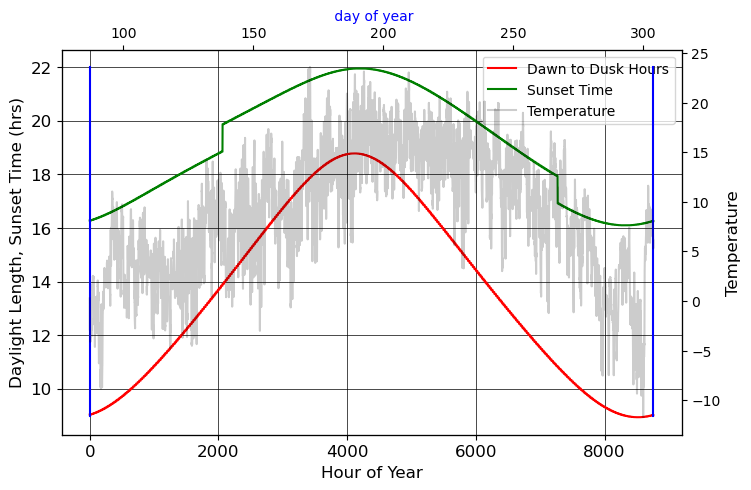

In [19]:
# plot daylight , sunset etc

fig = plt.figure(figsize=(8,5));
ax1 = fig.add_subplot(111)
it1 = ax1.plot(np.arange(len(hours)), hourlyDayLight, color='r',label='Dawn to Dusk Hours') 
it2 = ax1.plot(np.arange(len(hours)), hourlySunset, color='g',label='Sunset Time')

ax1.set_xlabel('Hour of Year', fontsize=12)
ax1.set_ylabel('Daylight Length, Sunset Time (hrs)', fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(color='k', linestyle='-', linewidth=0.5)


ax2 = ax1.twiny()  # instantiate a second x axes that shares the same y-axis
ax2.set_xlabel(' day of year', color='b')  # we already handled the y-label with ax1
#ax2.plot(np.arange(len(dates)), sunset, color='g')
ax2.plot(2*[dst_dates[0].dayofyear],[9,22],color='b')
ax2.plot(2*[dst_dates[1].dayofyear],[9,22],color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
it3 = ax3.plot(np.arange(len(hours)), hourlyTemp, color='k',label='Temperature',alpha=0.2)
ax3.set_ylabel('Temperature', fontsize=12)


items = it1+it2+it3
labs = [i.get_label() for i in items]
ax1.legend(items, labs, loc=0);

      
# MLR Training & Prediction Features :   
Need (t-168) buffer for naive model       
featureLength = $\sum_{i=1}^{6}$(endPred[i]-(startTrain[i]+168)) 

# Inputs for MLR        
a) Training and Prediction windows       
b) Hour of Day, Day Of Week etc Classifiers          
c) styles and labels          
d) load and environmental data series           

*Train on 6 week periods and test on following 2 weeks    
 ie periods will start on same day of week*  

 *must run following group of cells to set key parameters*

In [20]:
# set training and prediction window(s) :  maintain equal lengths for each period..

# preferred configuration: training on 6 periods across full year

nPeriods=6  
nWeeks=8   
trainWeeks=6  
predWeeks=2  

trainConfig = {'nPeriods':nPeriods,'nWeeks':nWeeks,'trainWeeks':trainWeeks,'predWeeks':predWeeks}

In [21]:
# set Classifiers: HourOfDay, DayOfWeek, Seasonality (PeriodOfYear)

#create HoD (Hour Of Day) classifier - see IRL3 script for analysis
nightTime = np.asarray([23,0,1,2,3,4,5,6])   # ie 2300 to 0700
earlyMorn = np.asarray([7,8,9])              # 0700 to 1000
dayTime = np.asarray([10,11,12,13,14,15])    # 1000 to 1600
eveningTime = np.asarray([16,17,18,19,20,21,22,23])   #1600 to 0000   OVERLAPS WITH nightTime
timeLists = [nightTime, earlyMorn, dayTime, eveningTime]   # list of lists

#create DayOfWeek classifier
dayClassifier = [[1,2,3,4],[5,6,0]]

# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year ; see IRL3 script
h1=np.arange(0,sum(daynum[0:6]))
h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))


PoYlist=[h1,h2]   # period of year list
#PoYlist


In [22]:
# Set styles and label classes

lineStyles = ['-','-.',':','--']
lineStyles = ['solid', 'dashdot','dotted', 'dashed']

#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html


lineColors = ['k','b','g','r','m','c']  
lineWidths = [2,2,4,3,3,3]
myStyles = {'lineStyles':lineStyles,'lineColors':lineColors,'lineWiths':lineWidths}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', \
          'September', 'October','November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
calVars = {'months':months,'daynum':daynum,'dayLabels':dayLabels}

for key in calVars.keys():
    print(key,'->',calVars[key])

for val in calVars.values():
    print(val)

months -> ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
daynum -> [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels -> ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [23]:
# PREPARE INPUTS 1:  - only need to do once for each trainConfig 

# Set windows and series lengths for each startTrain(i)+168 : end Pred(i))

featureLength,trainLength,predLength = 0,0,0
windows=np.zeros((nPeriods,4),dtype=np.int)  # to store train and predict windows

# loop through all periods, set training and prediction windows in each 
# NB : configured only for EQUAL length of each train+predict combined window 

for i in range(nPeriods):       # e.g. 6 periods of 8 weeks in year
    startTrain = np.int(i*(nWeeks*7)*24)        # start of each period
    endTrain = np.int( ((i*(nWeeks*7)+ (trainWeeks*7))*24))  # end of each training period
    startPred = endTrain
    endPred = np.int((i+1)*(nWeeks*7)*24)
    #print("startTrain:",startTrain,"endTrain:",endTrain,"startPred: ",startPred,"endPred: ",endPred)

    # train features start at startTrain+168 to capture aggLoad(t-168) data from TRAINING window only
    featureLength += (endPred-(startTrain+168))     # combined training+predict features
    trainLength += (endTrain-(startTrain+168))
    predLength += (endPred-startPred)     
 
    windows[i,0]= startTrain; windows[i,1]= endTrain
    windows[i,2]= startPred;  windows[i,3]= endPred
    
print("Totals: featureLength: ",featureLength,"trainLength: ",trainLength,"predLength: ",predLength)


Totals: featureLength:  7056 trainLength:  5040 predLength:  2016


In [24]:
print(windows)   # indices =  hour of year  
print(len(windows)) # number of periods.

[[   0 1008 1008 1344]
 [1344 2352 2352 2688]
 [2688 3696 3696 4032]
 [4032 5040 5040 5376]
 [5376 6384 6384 6720]
 [6720 7728 7728 8064]]
6


Funtion set_loadSeries returns dictionary of modified load pd.Series

windows = list of start/stop hour of year indices defining each training / prediction window
load = input load series e.g. aggregate load

In [25]:
# colate environmental series for train and test windows: for each startTrain(i)+168 : end Test(i))
# 'ALL' arg => collate train+test in one section for MLR inputs
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

for k,v in envSeries.items():
    print("env series:{0},length:{1},type:{2},first val:{3}".format(k,len(v),type(v),v[0]))


env series:temp,length:7056,type:<class 'numpy.ndarray'>,first val:-7.55
env series:dayLight,length:7056,type:<class 'numpy.ndarray'>,first val:9.204722222222221
env series:sunset,length:7056,type:<class 'numpy.ndarray'>,first val:16.429444444444446


# Define load series to use 

Funtion *set_loadSeries* returns dictionary of modified load pd.Series 

 windows = list of start/stop hour of year indices defining each training / prediction window    
 load = input load series e.g. aggregate load     


In [26]:
# define and print inputs to set_loadSeries function . MUST have 'yData','yDataTrain','yDataTest'. 
# For MLR, other series are needed JUST FOR PLOTTING and error computation? 
#          actual input time history series to regression are computed in populate_AllFeatures function

loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 
# count number of train (and test) series:
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)

loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range


print("loadSeriesList: {0}".format(loadSeriesList))
print("loadSeriesOffsetsWinStart: {0}".format(loadSeriesOffsetsWinStart))    
print("loadSeriesLagsWinEnd: {0}".format(loadSeriesLags))
print("loadSeriesWindows: \nstart window indices:{0}, \nend window indices:{1}".format\
      (loadSeriesWindows[:,0],loadSeriesWindows[:,1]))


numSeries: 5
loadSeriesList: ['yData', 'yDataTrain', 'SN24train', 'SN25train', 'SN26train', 'SN168train', 'yDataTest', 'SN24test', 'SN25test', 'SN26test', 'SN168test']
loadSeriesOffsetsWinStart: [168, 168, 168, 168, 168, 168, 0, 0, 0, 0, 0]
loadSeriesLagsWinEnd: [0, 0, 24, 25, 26, 168, 0, 24, 25, 26, 168]
loadSeriesWindows: 
start window indices:[0 0 0 0 0 0 2 2 2 2 2], 
end window indices:[3 1 1 1 1 1 3 3 3 3 3]


In [27]:
# colate load series for train and predict windows

loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

for k,v in loadSeries.items():
    print("{0} of length {1},{2}".format(k,len(v),type(v)))

series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
yData of length 7056,<class 'pandas.core.series.Series'>
yDataTrain of length 5040,<class 'pandas.core.series.Series'>
SN24train of length 5040,<class 'pandas.core.series

In [28]:
hourlyTemp

0       0.26
1      -0.95
2      -2.07
3      -2.97
4      -2.23
        ... 
8755    6.23
8756    6.10
8757    6.20
8758    5.30
8759    5.99
Name: temperature, Length: 8760, dtype: float64

In [29]:
# check for correct times etc
for series,vals in loadSeries.items():
    print(series)
    print(vals.head(2))

yData
2010-01-08 00:00:00    377.1495
2010-01-08 01:00:00    259.5030
dtype: float64
yDataTrain
2010-01-08 00:00:00    377.1495
2010-01-08 01:00:00    259.5030
dtype: float64
SN24train
2010-01-07 00:00:00    379.7755
2010-01-07 01:00:00    256.5365
dtype: float64
SN25train
2010-01-06 23:00:00    556.1845
2010-01-07 00:00:00    379.7755
dtype: float64
SN26train
2010-01-06 22:00:00    660.5565
2010-01-06 23:00:00    556.1845
dtype: float64
SN168train
2010-01-01 00:00:00    414.6385
2010-01-01 01:00:00    285.0400
dtype: float64
yDataTest
2010-02-12 00:00:00    317.3305
2010-02-12 01:00:00    213.3490
dtype: float64
SN24test
2010-02-11 00:00:00    291.4665
2010-02-11 01:00:00    206.4465
dtype: float64
SN25test
2010-02-10 23:00:00    438.9220
2010-02-11 00:00:00    291.4665
dtype: float64
SN26test
2010-02-10 22:00:00    548.385
2010-02-10 23:00:00    438.922
dtype: float64
SN168test
2010-02-05 00:00:00    280.0195
2010-02-05 01:00:00    188.1205
dtype: float64


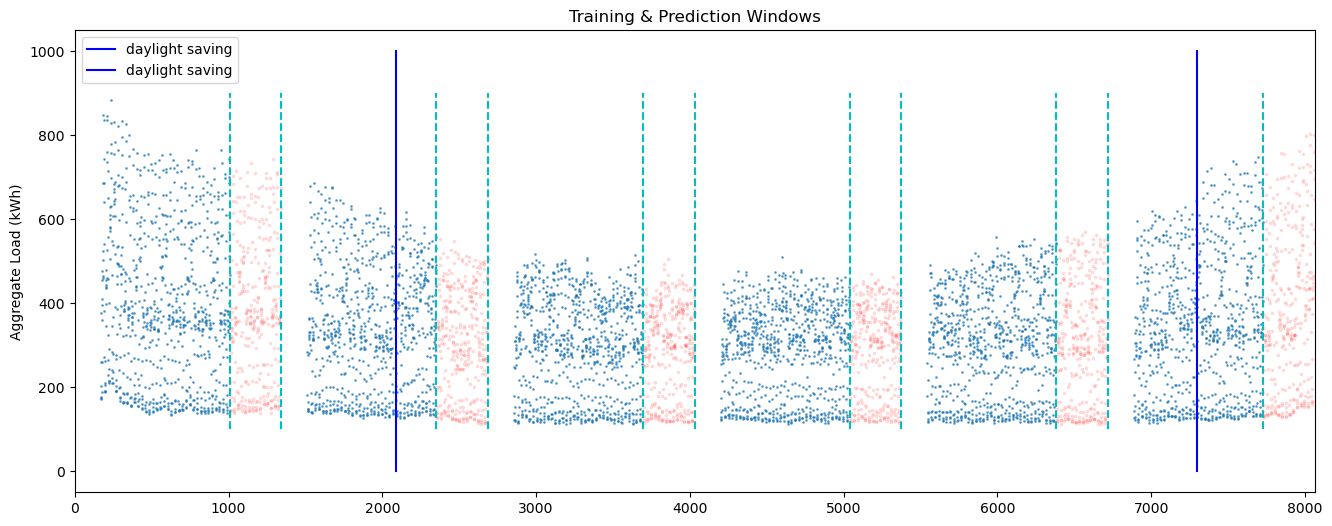

Hour of Year range: 168 8064


In [30]:
# Plot TRAINING and PREDICTION windows with semi-transparent scatter plot of load data

# construct constant series to show ranges of training and prediction windows
df = pd.DataFrame(index=(loadSeries['yDataTrain'].index).union(loadSeries['yDataTest'].index)) 
df['hourOfYear']=((df.index.dayofyear-1)*24)+df.index.hour
df1 = df.loc[loadSeries['yDataTrain'].index, :] 
df1['flg']=1
df1['hourOfYear']=((df1.index.dayofyear-1)*24)+df1.index.hour

df2 = df.loc[loadSeries['yDataTest'].index, :] 
df2['flg']=2
df2['hourOfYear']=((df2.index.dayofyear-1)*24)+df2.index.hour
df = pd.concat([df1,df2])

# plot a) data b)  window ranges
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

if len(windows)<=1:
    ax1.plot(df1['hourOfYear'],loadSeries['yDataTrain'].values,alpha=0.6)    
    ax1.plot(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,color='r') 
else:
    ax1.scatter(df1['hourOfYear'],loadSeries['yDataTrain'].values,s=1,alpha=0.6)
    ax1.scatter(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,s=3,color='r')


# add train and predict windows
yLim = get_limits(loadSeries['yData'], decimals=-2)     
for w,win in enumerate(windows):
    ax1.plot(2*[win[0]],[yLim[0],yLim[1]],color='c',linestyle='--')
    ax1.plot(2*[win[1]],[yLim[0],yLim[1]],color='c',linestyle='--')    
    
#add Daylight saving start/end dates
for d,date in enumerate(dst_dates):
    ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='b',label='daylight saving')
    #ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='y',label=legLabels[d])

ax1.set_ylabel('Aggregate Load (kWh)')  
ax1.set_title('Training & Prediction Windows')


ax1.set_xlim(0,df['hourOfYear'].max()+1)
ax1.legend()
plt.show()
del df1,df2

print("Hour of Year range:",df['hourOfYear'].min(),df['hourOfYear'].max()+1)
            

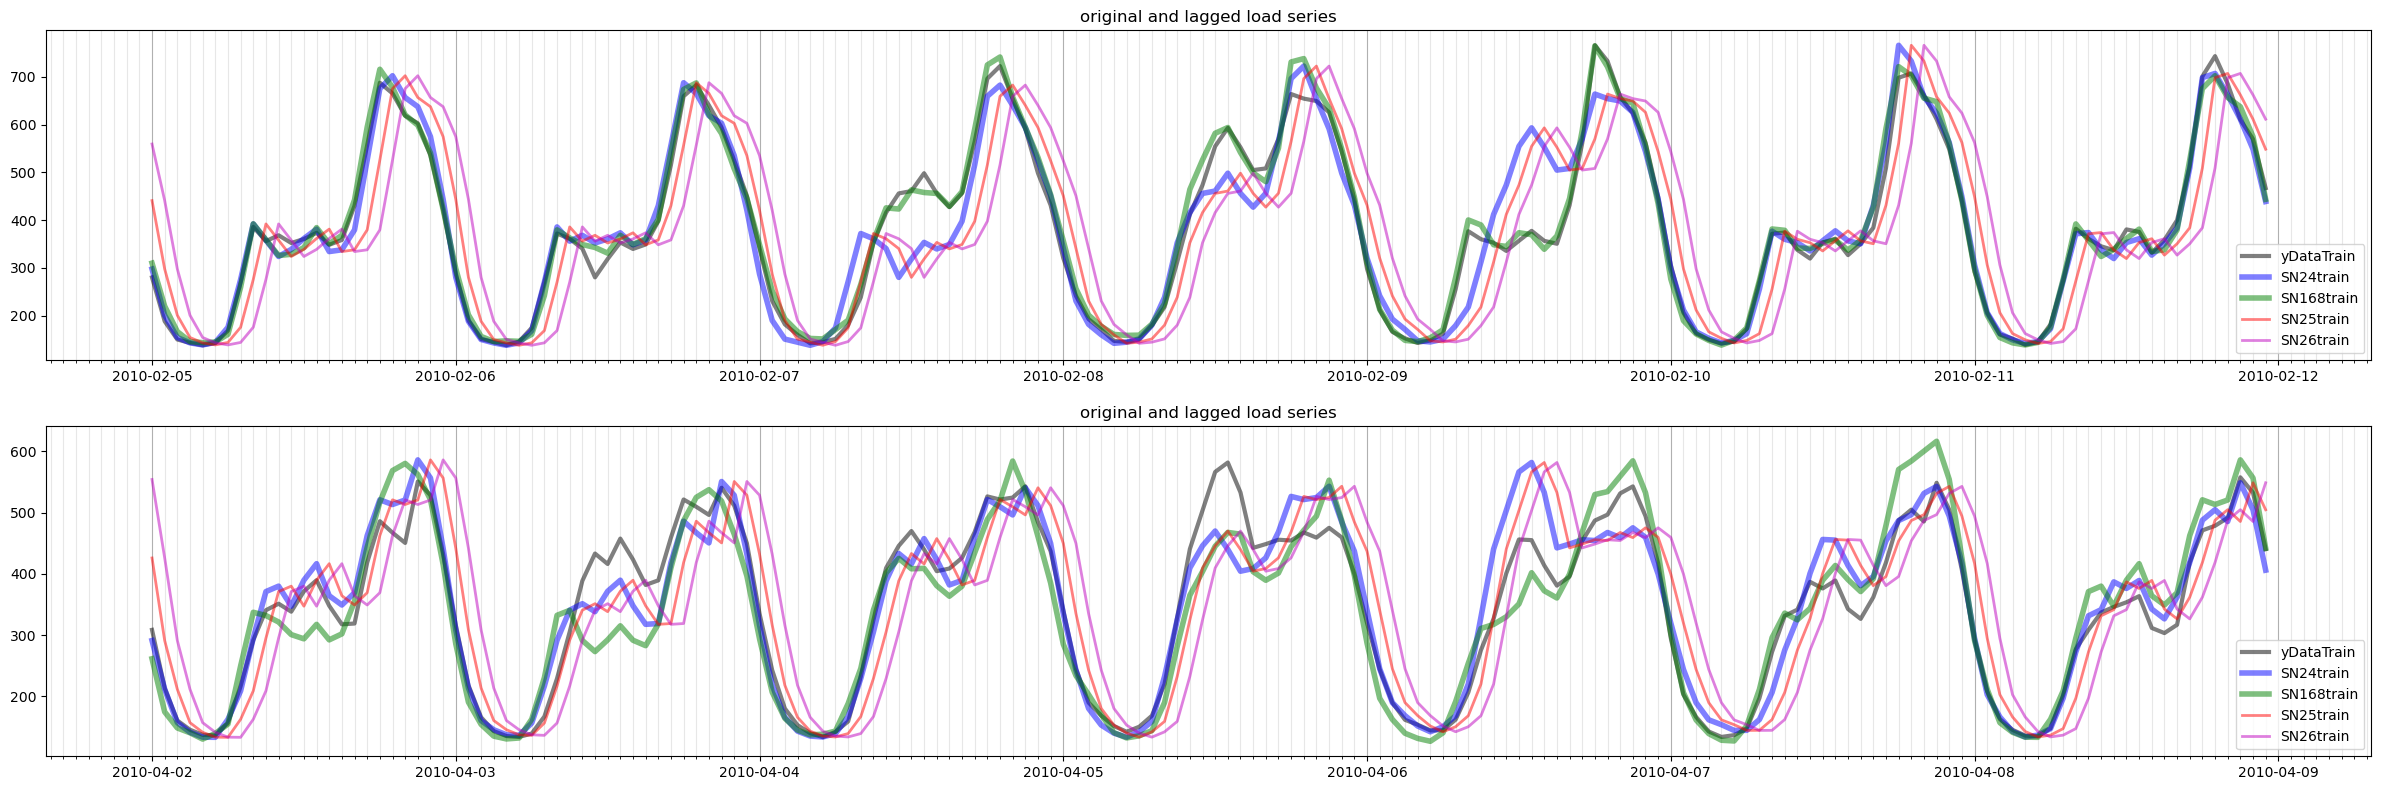

In [31]:
# plot t-24, etc load series

# shift predictions to align with hr/day indices ie unpack into actual time bands
loadSeries_plot = np.empty_like(aggLoad)
loadSeries_plot[:] = np.nan
lengthTrainSum,lengthTestSum = 0,0

#num windows to plot
numPlots=2
fig = plt.figure(figsize=(30,15*numPlots))
lineWidths = [3,4,4,2,2]
axs = []

# portion of windows to plot (relative to end of training )
lhs=-168
rhs=0

for i in range(len(windows)): 
    lengthTrain     = windows[i,1]-(windows[i,0]+168)
    lengthTest      = windows[i,3]-(windows[i,2])
    if i< numPlots:
        axs.append(fig.add_subplot(len(windows),1,i+1))
  
    for j,series in enumerate(['yDataTrain','SN24train','SN168train','SN25train','SN26train']):
        loadSeries_plot[(windows[i,0]+168):windows[i,1]]  = np.squeeze(loadSeries[series][lengthTrainSum:lengthTrainSum+lengthTrain])       
        if i<numPlots:
            axs[i].plot(aggLoad[windows[i,1]+lhs:windows[i,1]+rhs].index,loadSeries_plot[windows[i,1]+lhs:windows[i,1]+rhs], label=series, color=lineColors[j],alpha=0.5,linewidth = lineWidths[j]);
            axs[i].legend(loc='best')
            axs[i].xaxis.set_major_locator(MultipleLocator(1))
            axs[i].xaxis.set_minor_locator(MultipleLocator(1/24))
            axs[i].grid(b=True, which='major', axis='x',alpha=1) 
            axs[i].grid(b=True, which='minor', axis='x',alpha=0.3) 
            axs[i].set_title('original and lagged load series')

    lengthTrainSum += lengthTrain
    lengthTestSum += lengthTest
    

note from above plot:
- Plotting loadSeries dictionary : train series
- yDataTrain,SN24train,SN168train peaks aligned (on avg), see expected 1,2 hr shift in SN25train,SN26train

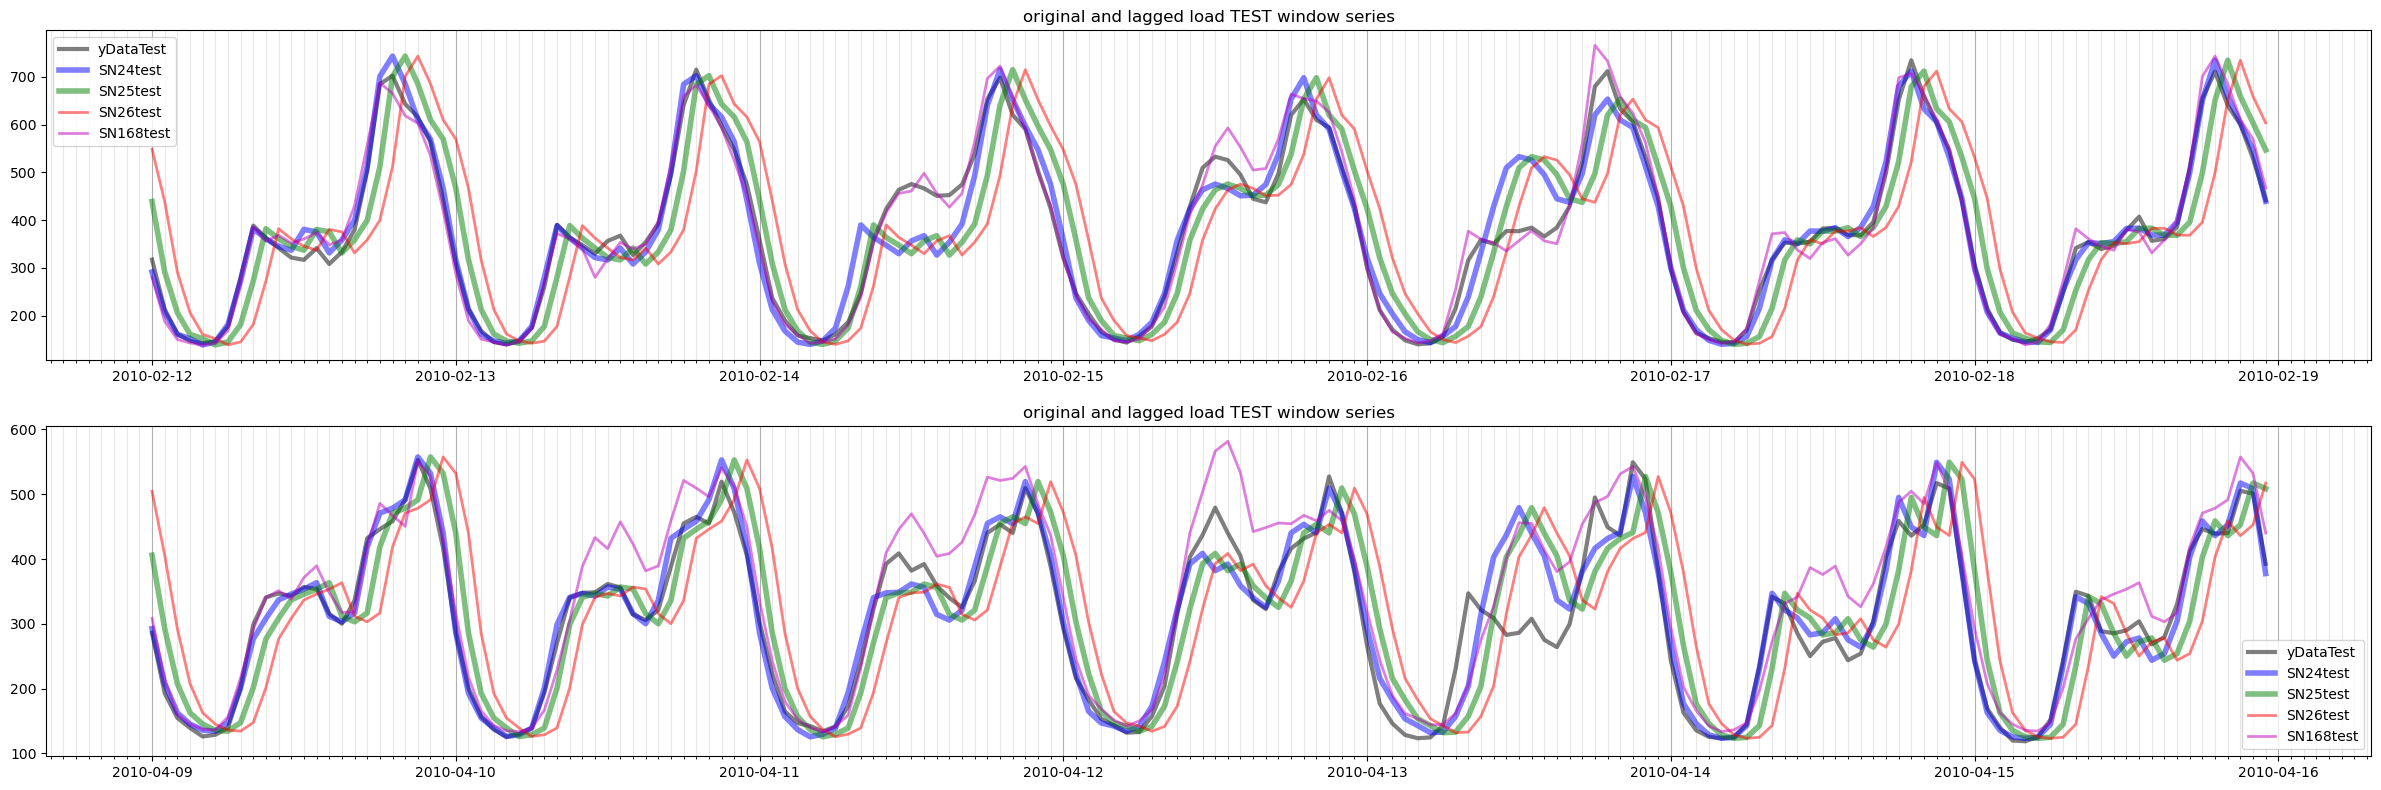

In [32]:
# now plot TEST windows

# plot t-24, etc load series

# shift predictions to align with hr/day indices ie unpack into actual time bands
loadSeries_plot = np.empty_like(aggLoad)
loadSeries_plot[:] = np.nan
lengthTrainSum,lengthTestSum = 0,0

#num windows to plot
numPlots=2
fig = plt.figure(figsize=(30,15*numPlots))
axs = []

# portion of windows to plot (relative to end of training )
lhs=0
rhs=168

for i in range(len(windows)): 
    lengthTrain     = windows[i,1]-(windows[i,0]+168)
    lengthTest      = windows[i,3]-(windows[i,2])
    if i< numPlots:
        axs.append(fig.add_subplot(len(windows),1,i+1))
  
    for j,series in enumerate(['yDataTest','SN24test','SN25test','SN26test','SN168test']):     #['yDataTest','SN24test','SN168test','SN25test','SN26test'])
        loadSeries_plot[(windows[i,2]):windows[i,3]]  = np.squeeze(loadSeries[series][lengthTestSum:lengthTestSum+lengthTest])       
        if i<numPlots:
            axs[i].plot(aggLoad[windows[i,2]+lhs:windows[i,2]+rhs].index,loadSeries_plot[windows[i,2]+lhs:windows[i,2]+rhs], label=series, color=lineColors[j],alpha=0.5,linewidth = lineWidths[j]);
            axs[i].legend(loc='best')
            axs[i].xaxis.set_major_locator(MultipleLocator(1))
            axs[i].xaxis.set_minor_locator(MultipleLocator(1/24))
            axs[i].grid(b=True, which='major', axis='x',alpha=1) 
            axs[i].grid(b=True, which='minor', axis='x',alpha=0.3) 
            axs[i].set_title('original and lagged load TEST window series')

    lengthTrainSum += lengthTrain
    lengthTestSum += lengthTest
    

# MLR - set up training inputs
12 HoD/Temperature terms: (3 for each of 4 HoD bands) i.e. 1,T,T^2       
6 OPTIONAL PoY/Daylight terms: (3 for each of 2 PeriodOfYear bands) i.e. 1,D,D^2         
6 DayOfWeek terms: 2 x contant terms ; 2 x 24 lag terms (ie Tues-Fri and Sat-Mon); 2 x 168 lag terms         
(all  𝛽  terms initially 1 by default )



# SKIP DOWN TO "## Now run everything in one cell" 
(IF WISH TO RUN EVERYTHING IN ONE GO, rather than step by step as follows:)



populate the allFeatures array:
Set input terms etc where t-24,t-168 loads read from aggLoad for e.g. week 1to7 of each period
Want allFeatures to contain just the training (e.g. weeks 2to6) and prediction (e.g. w7-8) periods, dropping week 1

In [33]:
#nEnvTerms = 12,18 etc   
# 12 for TempUnaware and  TempQuadratic 
# 18 for Temp+DayLight quadratic i.e. 3*4 ToD terms + 2 (PoY) *3 LoD terms
# 30 where testing 6 PoY divisions (instead of 2) *3 LoD terms  

nEnvTerms = 12   # min of 12 since code requires Temp HoD terms to be set even if not used (eg for Temp unaware model)



In [34]:
#  nDoWterms : 
# 6 for 'base case' ie t-24,t-168 ; 
# 10 if add t-25,t-26

nDoWterms = 6  # number of DayOfWeek terms

In [35]:
#populate allFeatures np array for aggregate forecast case  : this is where choose input lags to use

#base case : 6 DoW terms :DoW class*(1, t-24,t-168)
if nDoWterms == 6:
    allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                         envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries['dayLight'],\
                                  lags=[24,168],nDoWterms=6)
elif nDoWterms == 10:       #DoW class*(1, t-24,t-25,t-26,t-168)
    allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                         envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries['dayLight'],\
                                  lags=[24,25,26,168],nDoWterms=10)
    
allFeatures.shape

(7056, 18)

7056


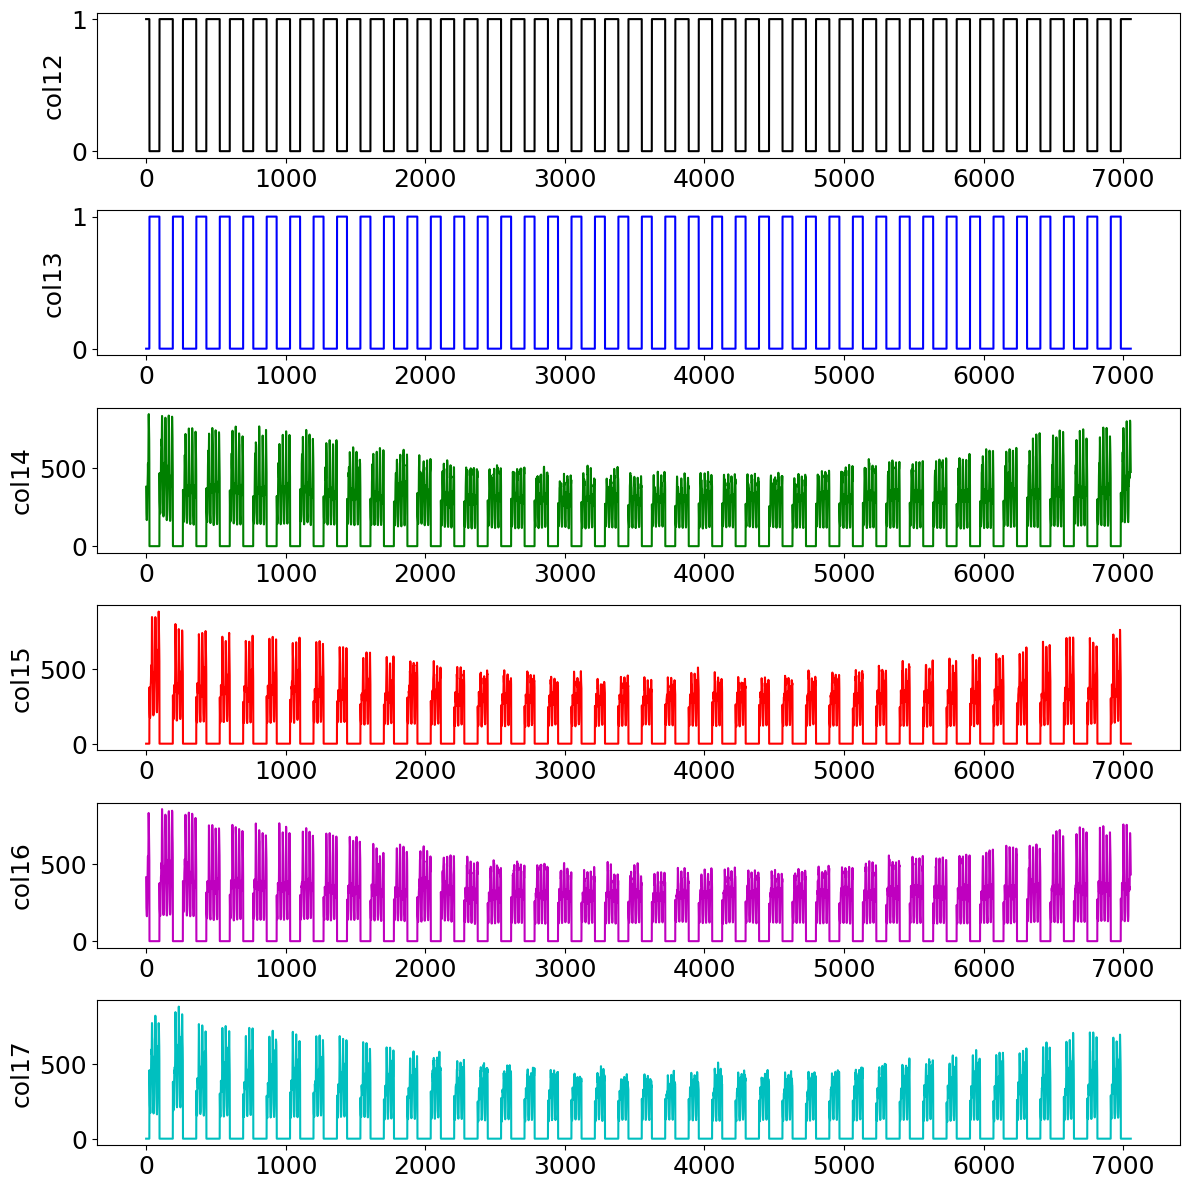

In [36]:
# plot DoW terms of allFeaturesTrain - error checking
#plot_allFeatures(nEnvTerms,nDoWterms,allFeatures,windowLength=2*168)
plot_allFeatures(nEnvTerms,nDoWterms,allFeatures) 

7056


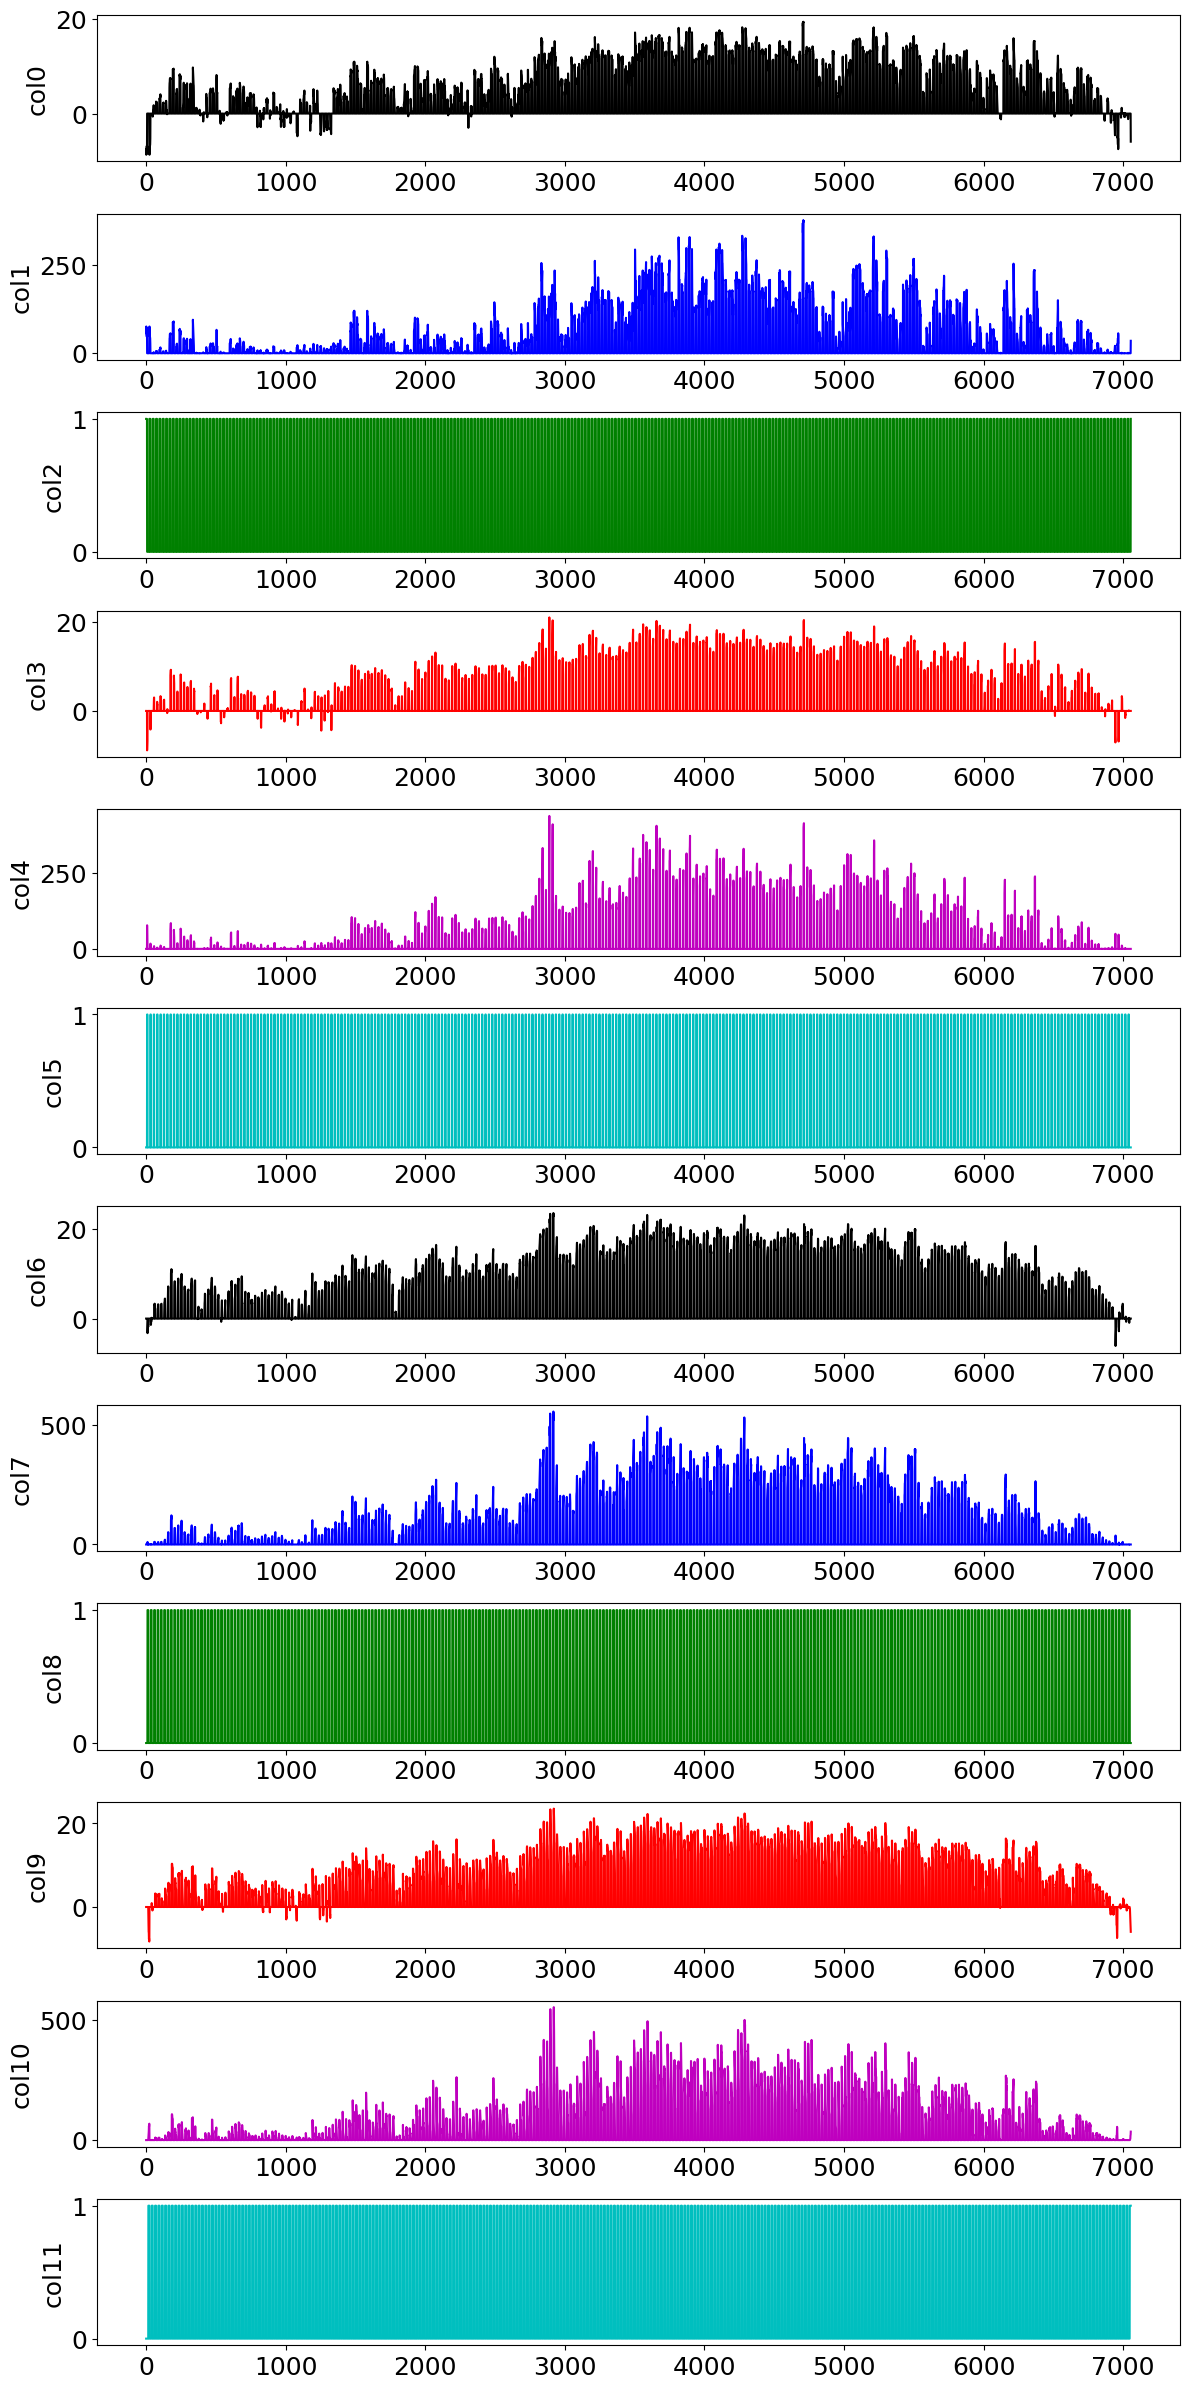

In [37]:
# plot 12 env terms of allFeaturesTrain - error checking : should have for each of 4 TimeOfDay classes, T,T^2,constant etc
plot_allFeatures(0,nEnvTerms,allFeatures) #windowLength=2*168) 

# Training & Prediction Data Setup

Recall: allFeatures has len(windows)*(trainLengthInd+predLengthInd) rows

for each period:
trainLength += (endTrain-(startTrain+168))
predLength += (endPred-startPred)

In [38]:
allFeaturesTrain,allFeaturesPredict = create_TrainPredictSeries(trainLength,predLength,allFeatures,windows,nEnvTerms,nDoWterms,'print_output')


lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)


In [39]:
allFeaturesTrain
allFeaturesTrain.shape


(5040, 18)

*Now make the models:*    
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Get model coefficients, intercept & run model on training data to get R2 coefficient

5040
2016


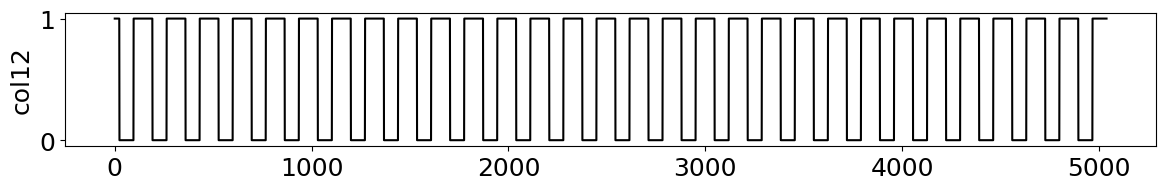

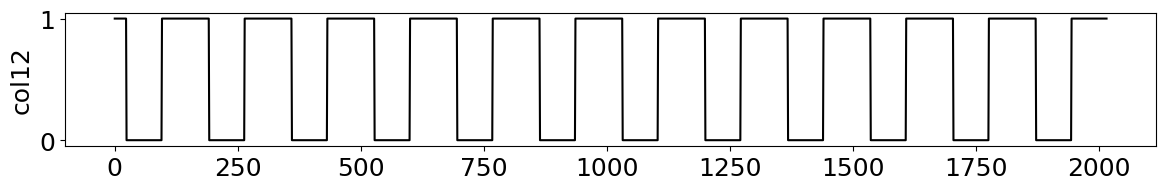

In [40]:
# plot day class of allFeaturesTrain - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesTrain)

# plot day class of allFeaturesPredict - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

In [41]:
# run MLR training for model with Quadratic environment variable dependency 
clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',allFeaturesTrain,\
                                                loadSeries['yDataTrain'],'print_output')      


Regression Model coefficients: 
 [ 3.19120415e-02 -1.69313886e-04 -7.67740092e+00 -1.55994314e+00
  8.23323126e-02  6.32225661e+00 -1.41133412e+00  6.16735850e-02
  1.28492778e+01 -5.94408484e-01  8.49909663e-03  2.01530032e+01
  8.21705618e-01 -8.21705618e-01  2.92006617e-01  3.24714105e-01
  6.26036380e-01  6.17394292e-01]
Regression Model Intercept: 18.655539118064326
R2 coefficient:  0.9633953460006998


In [42]:
# run MLR training for 'Unaware;' model i.e. with NO environment variable dependency 
clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',allFeaturesTrain[:,nEnvTerms:], \
                                            loadSeries['yDataTrain'],'print_output')      


Regression Model coefficients: 
 [ 0.96959705 -0.96959705  0.31404242  0.37156231  0.65682867  0.62500567]
Regression Model Intercept: 5.338560465381704
R2 coefficient:  0.962493342741426


In [43]:
aggLoad
allFeaturesTrain[:,nEnvTerms:]
allFeaturesPredict[:,nEnvTerms:]

array([[  1.    ,   0.    , 291.4665,   0.    , 280.0195,   0.    ],
       [  1.    ,   0.    , 206.4465,   0.    , 188.1205,   0.    ],
       [  1.    ,   0.    , 160.705 ,   0.    , 149.9965,   0.    ],
       [  1.    ,   0.    , 151.855 ,   0.    , 142.857 ,   0.    ],
       [  1.    ,   0.    , 138.742 ,   0.    , 137.8895,   0.    ],
       [  1.    ,   0.    , 144.8765,   0.    , 143.015 ,   0.    ],
       [  1.    ,   0.    , 181.6   ,   0.    , 168.621 ,   0.    ],
       [  1.    ,   0.    , 272.7365,   0.    , 270.049 ,   0.    ],
       [  1.    ,   0.    , 381.9255,   0.    , 385.69  ,   0.    ],
       [  1.    ,   0.    , 360.87  ,   0.    , 355.9325,   0.    ],
       ...,
       [  1.    ,   0.    , 460.0645,   0.    , 338.0845,   0.    ],
       [  1.    ,   0.    , 435.969 ,   0.    , 335.922 ,   0.    ],
       [  1.    ,   0.    , 517.973 ,   0.    , 437.0325,   0.    ],
       [  1.    ,   0.    , 727.221 ,   0.    , 617.0385,   0.    ],
       [  1.    ,   0.

In [44]:
# save the training data to create a NN
with open('../project_data/intermediateDataIreland/aggTrainingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesTrain, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('../project_data/intermediateDataIreland/aggTestingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesPredict, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('../project_data/intermediateDataIreland/aggLoad.pickle', 'wb') as f:
    pickle.dump(aggLoad, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('../project_data/intermediateDataIreland/aggLoadTraining.pickle', 'wb') as f:
    pickle.dump( loadSeries['yDataTrain'], f, protocol=pickle.HIGHEST_PROTOCOL)
with open('../project_data/intermediateDataIreland/aggLoadTesting.pickle', 'wb') as f:
    pickle.dump( loadSeries['yDataTest'], f, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
# save version of training data for unware model ie only 
with open('../project_data/intermediateDataIreland/aggTrainingDataUnaware.pickle', 'wb') as f:
    pickle.dump(allFeaturesTrain[:,nEnvTerms:], f, protocol=pickle.HIGHEST_PROTOCOL)
with open('../project_data/intermediateDataIreland/aggTestingDataUnaware.pickle', 'wb') as f:
    pickle.dump(allFeaturesPredict[:,nEnvTerms:], f, protocol=pickle.HIGHEST_PROTOCOL)

** Now look at the results on the (Prediction) validation period : **

In [45]:
# look at the predicted and actual load for the PREDICTION PERIOD
predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,allFeaturesPredict, loadSeries['yDataTest'])
predictedTempUnaware = mlr_predict(clfTempUnaware,allFeaturesPredict[:,nEnvTerms:nEnvTerms+6],loadSeries['yDataTest'])

5040
2016


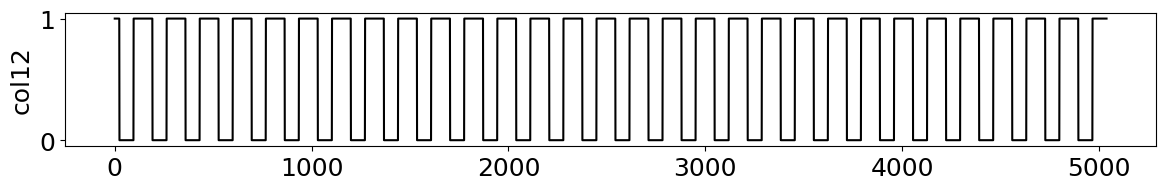

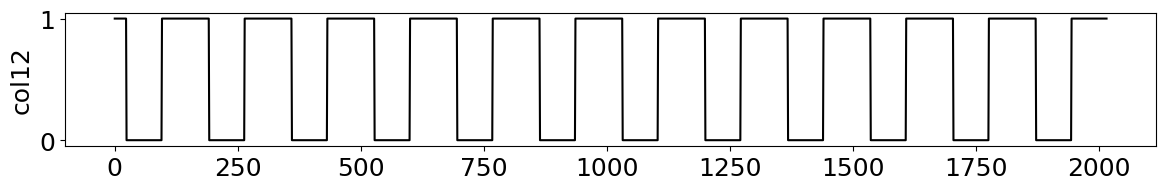

In [46]:
# plot day class of allFeaturesTrain - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesTrain)
# plot day class of allFeaturesPredict - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

** Plot PREDICTED load profiles **

(733780.0, 734108.9583333334)

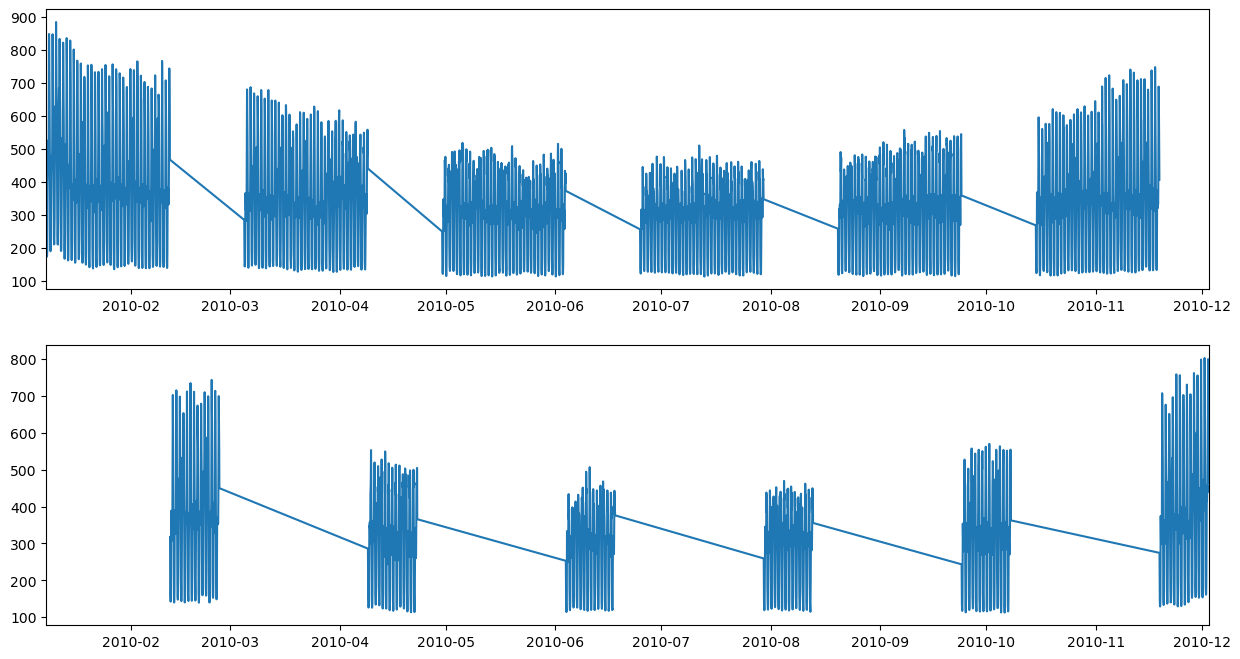

In [47]:
# quick and dirty plot - load series for training and forecast windows
fig = plt.figure(figsize = (15,8))
xLim=(loadSeries['yData'].index.min(),loadSeries['yData'].index.max())
ax1 = fig.add_subplot(211)
ax1.plot(loadSeries['yDataTrain'].index,loadSeries['yDataTrain'])
ax1.set_xlim(xLim[0],xLim[1])

ax2 = fig.add_subplot(212)
ax2.plot(loadSeries['yDataTest'].index,loadSeries['yDataTest'])
ax2.set_xlim(xLim[0],xLim[1])


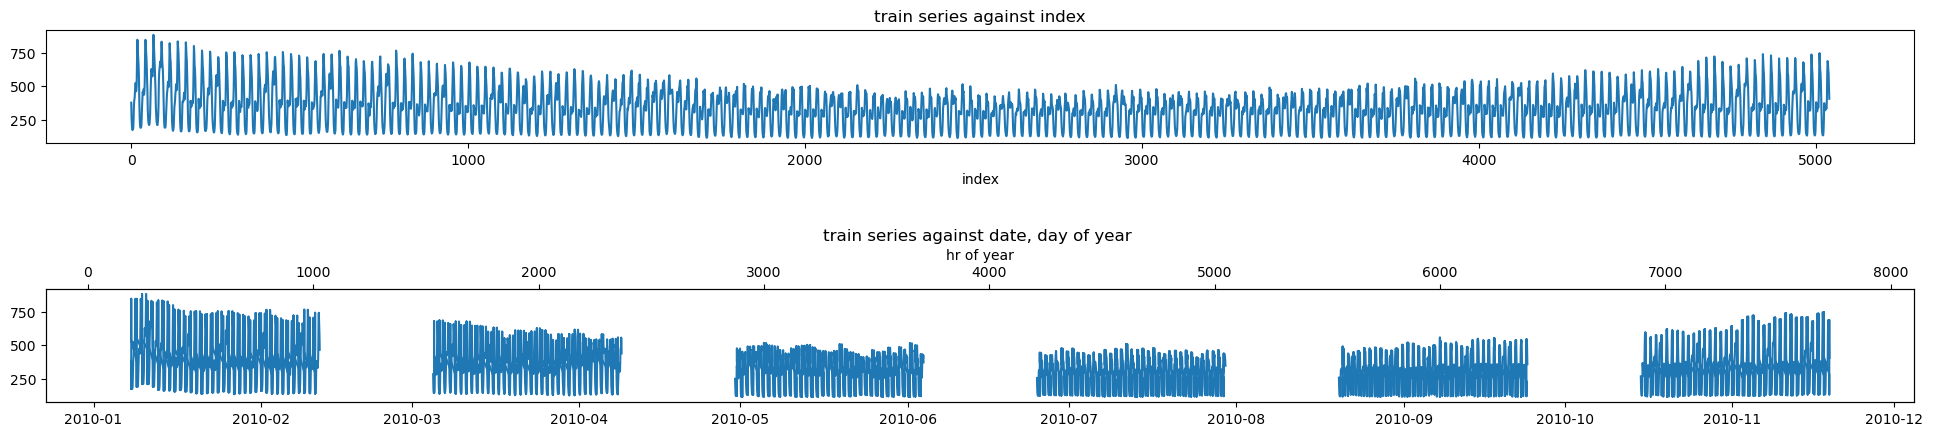

In [48]:
#shift inputs to actual time bands and plot comparison a) against index b) against date
fig = plt.figure(figsize = (20,5))
axs = fig.add_subplot(211)
axs.plot(np.arange(len(loadSeries['yDataTrain'])),loadSeries['yDataTrain'])
axs.set_title('train series against index')
axs.set_xlabel('index')

plotSeries = shiftInputs(aggLoad,windows,loadSeries['yDataTrain'],trainTestFlg='train')

ax2 = fig.add_subplot(212)
ax2.plot(aggLoad.index,plotSeries)
ax3 = ax2.twiny()
ax3.plot((aggLoad.index.dayofyear*24),plotSeries)
ax3.set_xlabel('hr of year')
ax3.set_title('train series against date, day of year ')
fig.tight_layout(pad=3.0)


In [1]:
# create dictionary of model names to plot

# for train windows
#models = {'yDataTrain':loadSeries['yDataTrain'],quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
#          'SN24train': loadSeries['SN24train'],'SN168train': loadSeries['SN168train']}
#start=windows[0,0]

#for test windows:
models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
start=windows[4,2]

plot_forecast(2,windows,start,aggLoad,models,calVars,myStyles)
#plot_forecast(2,windows,start,aggLoad,models,calVars,myStyles)


NameError: name 'loadSeries' is not defined

plot PREDICTED load profiles as stack plot for each day

12 weeks, 5 'models'of seriesLength: 2016
Model name: load Length of Series: 2016, #days 84
Model name: quadTemp Length of Series: 2016, #days 84
Model name: tempUnaware Length of Series: 2016, #days 84
Model name: SN24 Length of Series: 2016, #days 84
Model name: SN168 Length of Series: 2016, #days 84


c:\users\fmurphy\onedrive - loughborough university\fm-project\mscprojectcoding\src\mscprojectcoding\FM_MScProject_LoadForecasting_Module.py:980: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


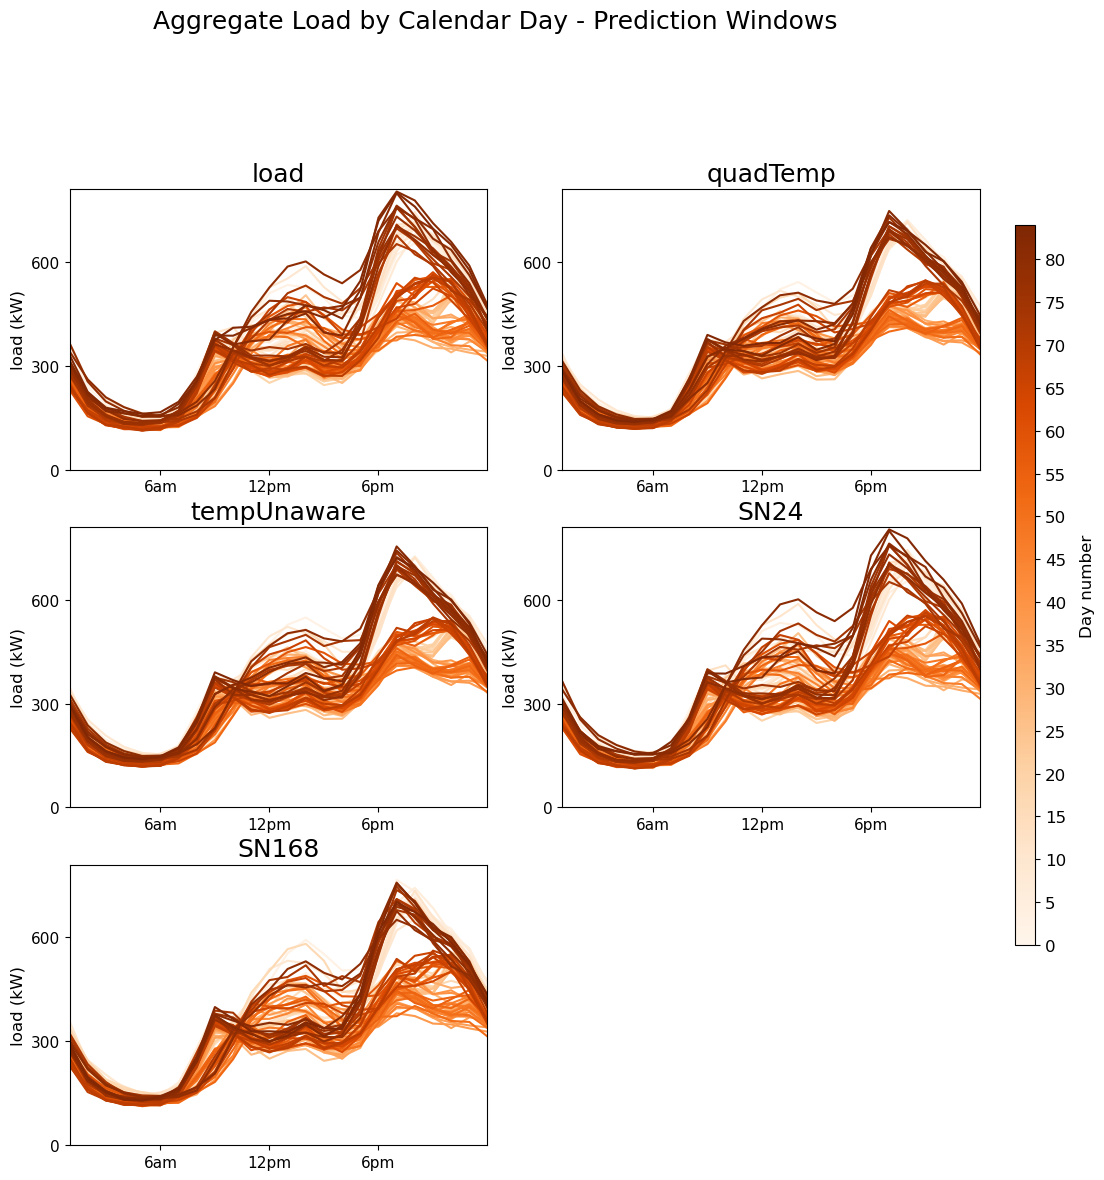

In [50]:
# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
stackplot_of_forecast(models,len(windows)*predWeeks,'print_output',figTitle='Aggregate Load by Calendar Day - Prediction Windows')

36 weeks, 4 'models'of seriesLength: 5040
Model name: load Length of Series: 5040, #days 210
Model name: quadTemp Length of Series: 5040, #days 210
Model name: tempUnaware Length of Series: 5040, #days 210
Model name: SN24 Length of Series: 5040, #days 210


c:\users\fmurphy\onedrive - loughborough university\fm-project\mscprojectcoding\src\mscprojectcoding\FM_MScProject_LoadForecasting_Module.py:980: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


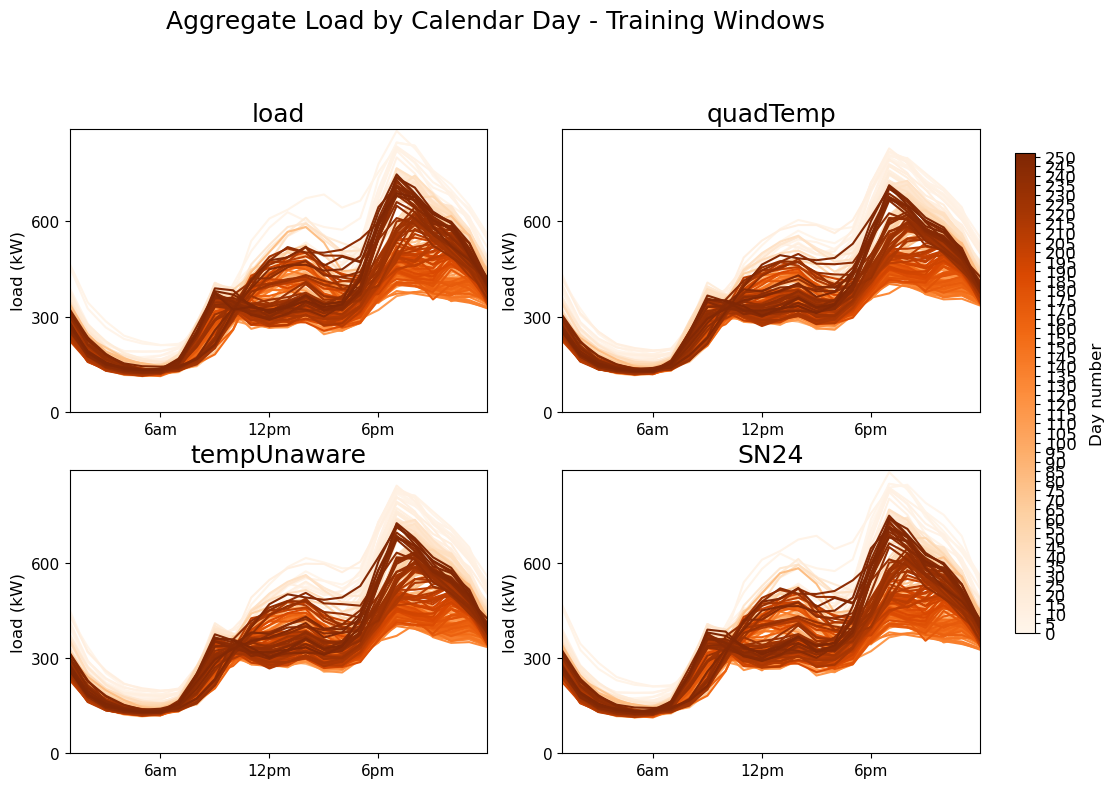

In [51]:
# now plot same for TRAINING windows

# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTrain'],'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train']} #'SN168': loadSeries['SN168train']}
stackplot_of_forecast(models,len(windows)*trainWeeks,'print_output',figTitle='Aggregate Load by Calendar Day - Training Windows')

error analysis for AGGREGATE prediction:

In [52]:
models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
errors = get_errors(loadSeries['yDataTest'],models,'nrmseNorm')
print("Mapes: \n",errors['MAPEs'])

# could also put in df with nrows = nModels; nCols = nErrorTypes
df_errors = pd.DataFrame.from_dict(errors)
df_errors['models']=list(models.keys())
df_errors = df_errors.set_index('models')
df_errors



Mapes: 
 [0.05786084 0.05760803 0.07366834 0.06414371]


MAPEs      MCVs     MRMSEs   MNRMSEs       MAEs
models                                                         
quadTemp     0.057861  0.083959  27.579310  0.076724  19.046760
tempUnaware  0.057608  0.084421  27.731041  0.077147  18.975273
SN24         0.073668  0.123558  40.586971  0.112911  24.354043
SN168        0.064144  0.097482  32.021349  0.089082  21.324159

max Value of all errors % : [0.07366833901335086, 0.12355817472166736, 40.58697055662779, 0.11291121619024765, 24.354042906746084]


(<Figure size 600x400 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1acb40475f8>)

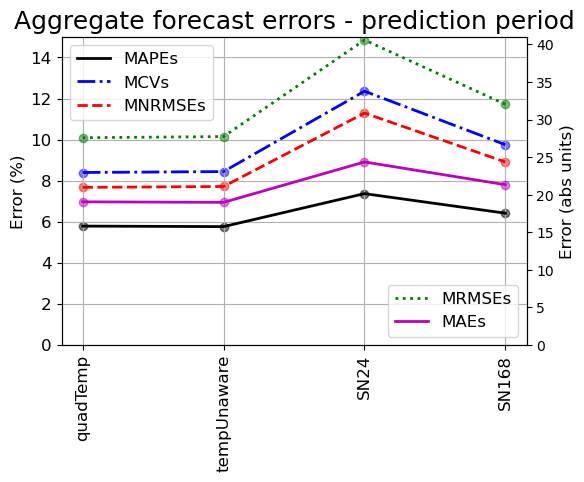

In [53]:
plot_errors(errors,models,myStyles,figTitle='Aggregate forecast errors - prediction period')

In [54]:
# get MAPEs for the training period for comparison : 

models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
errorsTrain = get_errors(loadSeries['yDataTrain'],models,'nrmseNorm')
print("Mapes: \n",errorsTrain['MAPEs'])

errorsTrain

Mapes: 
 [0.0575278  0.05833728 0.08036621 0.06324645]


{'MAPEs': array([0.0575278 , 0.05833728, 0.08036621, 0.06324645]),
 'MCVs': array([0.08490383, 0.08594356, 0.12913381, 0.09941612]),
 'MRMSEs': array([28.19620569, 28.54149363, 42.88479584, 33.01567413]),
 'MNRMSEs': array([0.07760548, 0.07855583, 0.11803344, 0.09087029]),
 'MAEs': array([19.32566051, 19.50282804, 26.7216121 , 21.5972626 ])}

max Value of all errors % : [0.08036621166792675, 0.1291338128390771, 42.88479584415451, 0.11803344176671884, 26.72161210317456]


(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1acb3fe6f98>)

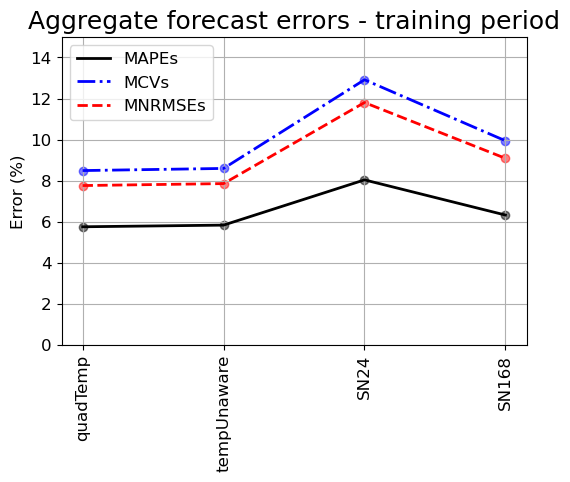

In [55]:
plot_errors(errorsTrain,models,myStyles,'%only',figTitle='Aggregate forecast errors - training period')

# Now run everything in one cell 


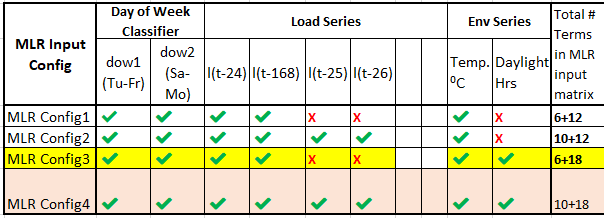


In [57]:
# AGGREGATE CASE  

#df to track  aggregate errors
MLR_MAPEs_df = pd.DataFrame()


  
### Select required option 

In [58]:
configStr='config1'
nEnvTerms = 12         # 12 for TempUnawar & TempQuadratic,18 for Temp+DayLight or Temp+Sunset quadratic 
nDoWterms = 6          # day of week terms ie 2 * 3 (l,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags= [24,168]         # lags=[24,25,26,168]


In [62]:
configStr='config2'
nEnvTerms = 12         # 12 for TempUnawar & TempQuadratic,18 for Temp+DayLight or Temp+Sunset quadratic 
nDoWterms = 10         # day of week terms ie 2 * 3 (l,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags= [24,25,26,168]   # lags=[24,25,26,168]


In [65]:
configStr='config3'
nEnvTerms = 18         # 12 for TempUnawar & TempQuadratic,18 for Temp+DayLight or Temp+Sunset quadratic 
nDoWterms = 6          # day of week terms ie 2 * 3 (l,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags= [24,168]         # lags=[24,25,26,168]


In [68]:
configStr='config4'
nEnvTerms = 18         # 12 for TempUnawar & TempQuadratic,18 for Temp+DayLight or Temp+Sunset quadratic 
nDoWterms = 10          # day of week terms ie 2 * 3 (l,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags= [24,25,26,168]         # lags=[24,25,26,168]


series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
7056
Mapes Training: 
 [0.05712466 0.0580777  0.08036621 0.06324645]
max Value of all errors % : [0.08036621166792675, 0.1291338128390771, 42.88479584415451, 0.1180334417

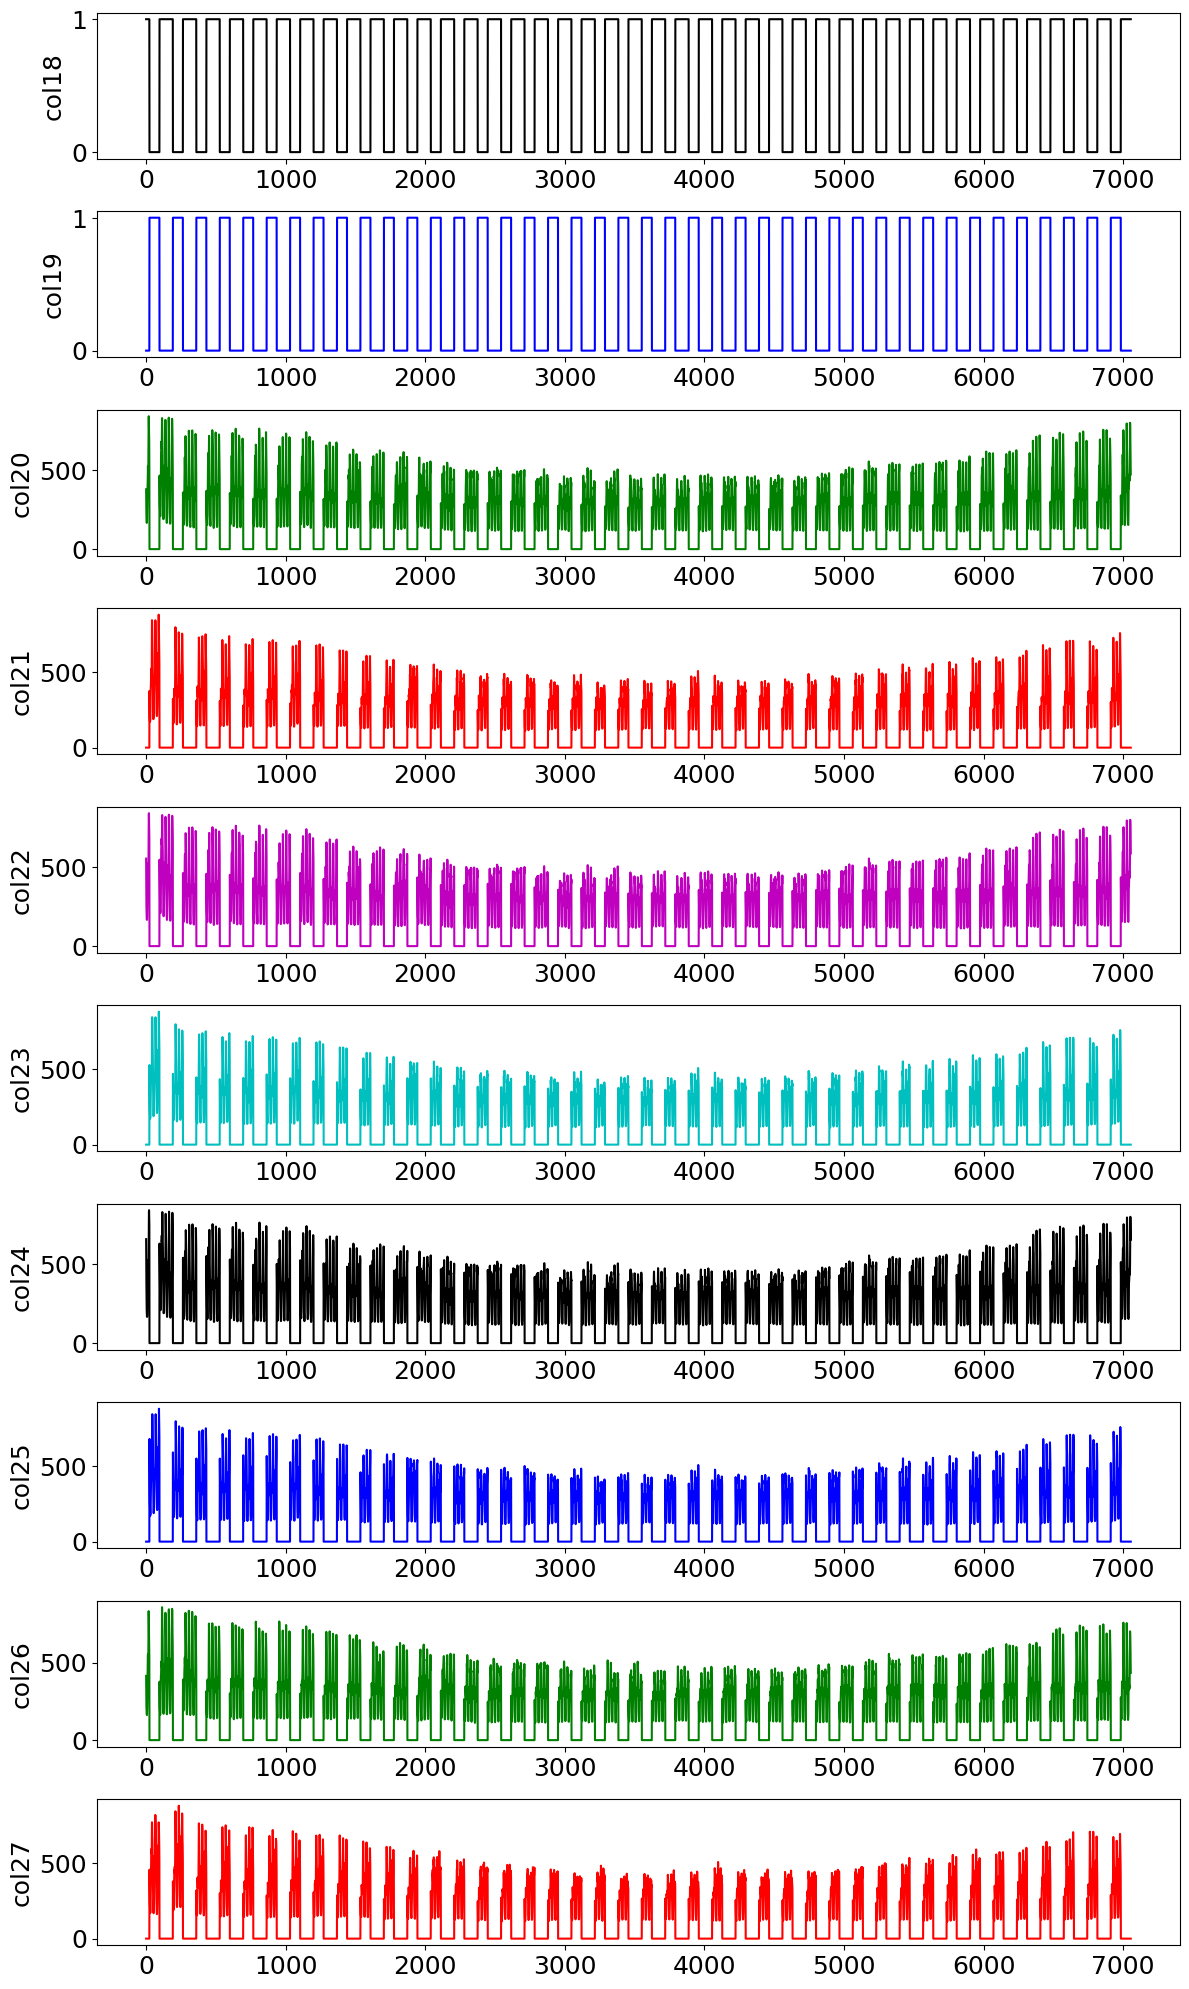

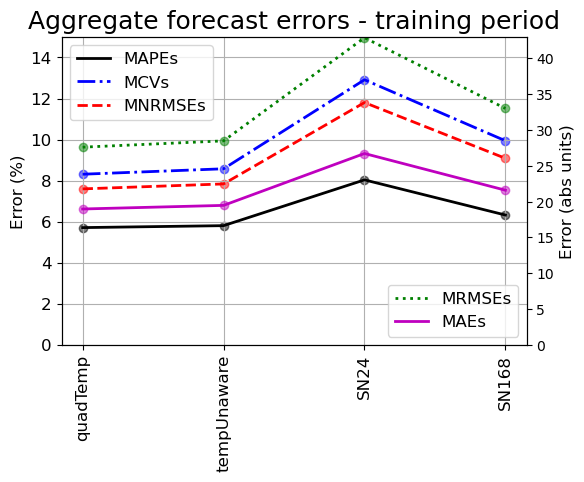

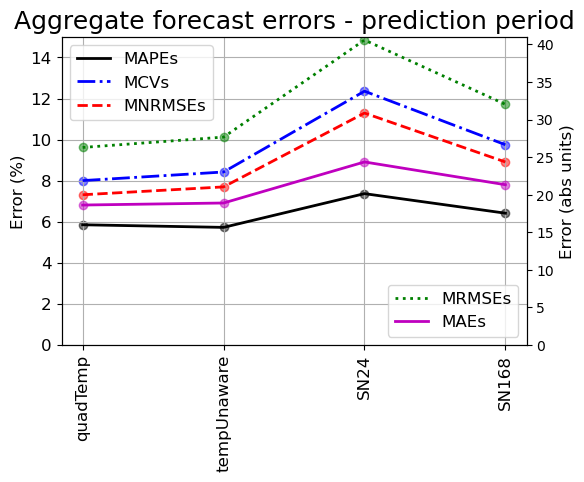

In [69]:
# AGGREGATE CASE 

# collate adjusted load series for train and predict windows - ensure inputs are still  configured correctly 
loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

# collate environmental data numpy arrays - same for all load combinations
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

#populate allFeatures for aggregate case  
allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                     envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries[lodSeries],\
                              lags=lags,nDoWterms=nDoWterms)

# plot day class of allFeaturesTrain -  error checking
plot_allFeatures(nEnvTerms,nDoWterms,allFeatures)

#set train and predict features
allFeaturesTrain,allFeaturesPredict = create_TrainPredictSeries(trainLength,predLength,allFeatures,windows,nEnvTerms,nDoWterms)

# plot day class of allFeaturesTrain,allFeaturesPredict - error checking
#plot_allFeatures(nEnvTerms,1,allFeaturesTrain)
#plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

# run MLR training:
#for model with Quadratic environment variable dependency 
clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',allFeaturesTrain,loadSeries['yDataTrain'])      
# for 'Unaware;' model i.e. with NO environment variable dependency 
clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',allFeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      

# look at the predicted and actual load for the PREDICTION PERIOD
predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,allFeaturesPredict,loadSeries['yDataTest'])
predictedTempUnaware = mlr_predict(clfTempUnaware,allFeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


# Plot forecast as a) standard profile :
# create dictionary of model names to plot
models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
start=windows[4,2]
#plot_forecast(2,windows,start,aggLoad,models)

# Plot forecast as (b) stacked 1 day profiles:
# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test']} #'SN168': loadSeries['SN168test']}
#stackplot_of_forecast(models,len(windows)*predWeeks)

#calculate errors and plot (training windows)
models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
errorsTrain = get_errors(loadSeries['yDataTrain'],models,'nrmseNorm')
print("Mapes Training: \n",errorsTrain['MAPEs'])
plot_errors(errorsTrain,models,myStyles,figTitle='Aggregate forecast errors - training period')

#calculate errors and plot (prediction windows)
models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
errors = get_errors(loadSeries['yDataTest'],models,'nrmseNorm')
print("Mapes Forecast: \n",errors['MAPEs'])
f,a = plot_errors(errors,models,myStyles,figTitle='Aggregate forecast errors - prediction period')
f

with open('../project_data/intermediateDataIreland/aggErrorsTest.csv'+str(configStr), 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, errors.keys())
    w.writeheader()
    w.writerow(errors)
    
with open('../project_data/intermediateDataIreland/aggErrorsTrain.csv'+str(configStr), 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, errorsTrain.keys())
    w.writeheader()
    w.writerow(errorsTrain)
    


In [70]:
df_ = pd.DataFrame(errors['MAPEs'],columns=['TestMAPEs'])
df_ = pd.concat([df_,pd.DataFrame(errorsTrain['MAPEs'],columns=['TrainMAPEs'])],axis=1)
df_['config'] = configStr
df_['model'] = ['quadratic','unaware','SN24','SN168']
df_

TestMAPEs  TrainMAPEs   config      model
0   0.058510    0.057125  config4  quadratic
1   0.057235    0.058078  config4    unaware
2   0.073668    0.080366  config4       SN24
3   0.064144    0.063246  config4      SN168

In [77]:
# get errors for weekdays only for persistence models
#models = {'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
weekdays = dayClassifier[0]  # Tues-Fri
loadSeriesWeekdays={}
for k in ['SN24test','SN168test','yDataTest']:
    loadSeriesWeekdays[k] = loadSeries[k][pd.Series(loadSeries[k].index.dayofweek).isin(weekdays).values]
#loadSeriesWeekdays['yDataTest'] = loadSeries['yDataTest'][pd.Series(loadSeries['yDataTest'].index.dayofweek).isin(weekdays).values]

In [80]:
#calculate errors and plot (prediction windows)
SNmodels = {'SN24': loadSeriesWeekdays['SN24test'],'SN168': loadSeriesWeekdays['SN168test']}
SNerrors = get_errors(loadSeriesWeekdays['yDataTest'],SNmodels,'nrmseNorm')
print("Mapes Forecast: \n",SNerrors['MAPEs'])
SNerrors

f
a

Mapes Forecast: 
 [0.04969364 0.06907684]


*Now create random user groups and get aggregate load for each*     
Next 2 cells just testing

In [65]:
# test using N=10
df_randIDgrps_N = randomUserGroups(hourly_df,10)
#print(df_randIDgrps_N)

# loop through randID groups and get aggregate load series for each
df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)


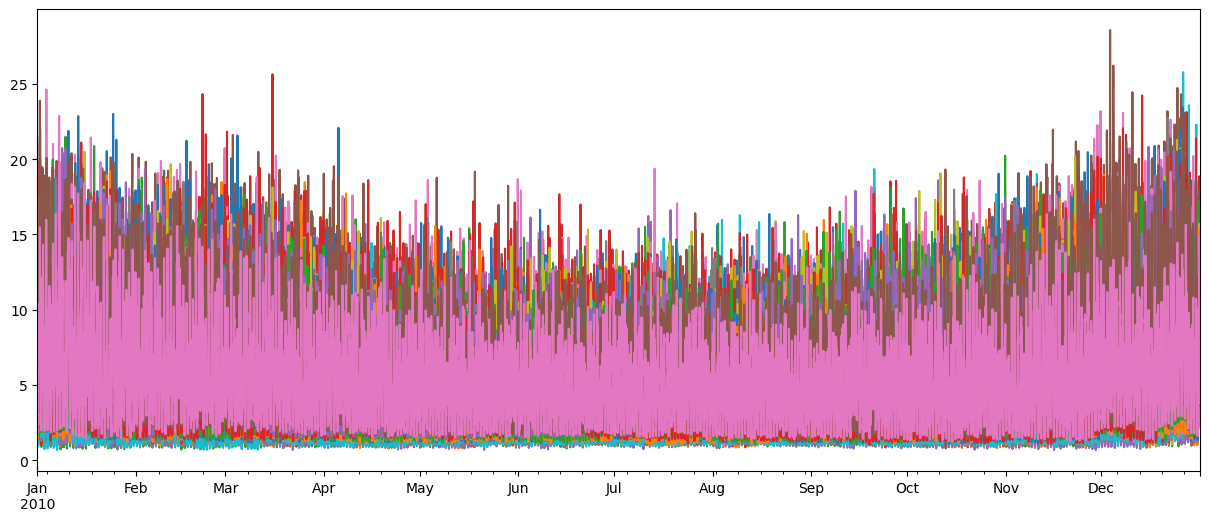

In [66]:
# plot aggregate of sub-groups
df_grpAggLoad_N.plot(figsize=(15,6),legend=False,use_index=True)

# Now run MLR training on subsets of size N users        
loop through columns of df_grpAggLoad_N for each aggregation size N

MLR configurations to run - summary:
1) [t-24,t-168] (6 DoW load terms)+[temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
- also returns UNAWARE version (just the DoW load terms)

2) [t-24,t-25,t-26,t-168] (10 DoW terms) + [temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
- also returns UNAWARE version (just the DoW load terms)

3) [t-24,t-168] (6 DoW load terms)+[temperature] + [dayLight] 
(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
- Unaware model is same as 1)

4)  add Daylight to 2)

5),6) perhaps add sunset if exclude DST dates...
   


# define 'do it all' MLR function 
keep here for simplicity - ugly parameter list but tidy into dictionaries some other time

In [136]:
def runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles,grpAggFile=None,**kwargs):
    
    errorsAgg = {}  # create empty dictionary to hold set of dataframes with error stats for each aggregation level
    #initialize dict to hold forecast series and N-level aggregate loads
    mlrTestPredict_dict = {}     # forecasts for TEST windows   
    
    if grpAggFile is None:
        grpAggLoad_N_dict = {}       # group aggregate loads AND record of userIDs in each grp
    else:
        grpAggLoad_N_dict = grpAggFile
    

    for N in aggregation_N:        
        if grpAggFile is None:
            # Run 'out of sample' selection of random user subsets of size N
            df_randIDgrps_N = randomUserGroups(hourly_df,N)

            # loop through randID groups and get aggregate load series for each
            df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)
        else:
            df_randIDgrps_N = grpAggLoad_N_dict[str(N)]['randIDgrps_N']
            df_grpAggLoad_N = grpAggLoad_N_dict[str(N)]['grpAggLoad_N']        
        
        #NEW : initialize dfs to hold forecast series for N
        quadratic_df = pd.DataFrame()
        unaware_df = pd.DataFrame()
        SN24test_df = pd.DataFrame()
        SN168test_df = pd.DataFrame()

        #initialize dataFrame to hold error stats
        df_errorsAgg_N_MAPEs = pd.DataFrame()
        df_errorsAgg_N_MCVs = pd.DataFrame()
        df_errorsAgg_N_MNRMSEs = pd.DataFrame()

        columns=[]  # df column names

        #Loop through each aggregate group of size N 
        start_time = time.time()
        for i,col in  enumerate(df_grpAggLoad_N.columns):
            load = df_grpAggLoad_N[col]
            #print("Aggregate {0}, series length {1}".format(col,load.shape[0]))

            # collate load and environmental series for train and predict windows
            loadSeries = set_loadSeries(windows,load,\
                                        loadFormParams['loadSeriesList'],loadFormParams['loadSeriesOffsetsWinStart'],\
                                        loadFormParams['loadSeriesLags'],loadFormParams['loadSeriesWindows']\
                                       )  # return dictionary of all load series 

            #populate allFeatures 
            Features = populate_AllFeatures(windows,featureLength,loadSeries['yData'],load,\
                                 envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,\
                                LoD=envSeries[lodSeries],lags=lags,nDoWterms=nDoWterms)      

            # plot day class of allFeaturesTrain - error checking; plot first group
            if (i==0):
                plot_allFeatures(nEnvTerms+2,1,Features,windowLength=2*168)   # plot 1 of t-24 terms   

            #set train and predict features
            FeaturesTrain,FeaturesPredict = create_TrainPredictSeries(trainLength,predLength,Features,windows,nEnvTerms,nDoWterms)

            #if (i==0):
            #    plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

            # run MLR training:
            #for model with Quadratic environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - QUADRATIC model :")
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'],'print_output')      
            else:
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'])

            # for 'Unaware;' model i.e. with NO environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - UNAWARE model:")
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'],'print_output')                                                               
            else:
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      


            # look at the predicted and actual load for the PREDICTION PERIOD
            predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,FeaturesPredict,loadSeries['yDataTest'])
            predictedTempUnaware = mlr_predict(clfTempUnaware,FeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


            # plot forecast for n (e.g. 2) 1 week sections: just for every 10th or 20th group etc
            if (i%30==0):     
                models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
                start=windows[4,2]
                # plot_forecast(1,windows,start,load,models,figTitle='forecast for aggregation level '+str(N))         

            # NEW :save forecast dictionary for each N,grp: append results for current grp    
            models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                      'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
            quadratic_df = pd.concat([quadratic_df,pd.DataFrame(models['quadTemp'])],axis=1)
            unaware_df = pd.concat([unaware_df,pd.DataFrame(models['tempUnaware'])],axis=1)
            SN24test_df = pd.concat([SN24test_df,pd.DataFrame(models['SN24'])],axis=1)
            SN168test_df = pd.concat([SN168test_df,pd.DataFrame(models['SN168'])],axis=1)

          
            #calculate errors and plot (PREDICTION windows)
            errors = get_errors(loadSeries['yDataTest'],models)

            #if want to plot errors .. too many 
            #if (i%20==0):      
            #    plot_errors(errors,models,myStyles,figTitle=col+'forecast errors - prediction period')

            # add col to errors df for MAPEs
            columns.append(col)
            df_errorsAgg_N_MAPEs = pd.concat([df_errorsAgg_N_MAPEs,pd.DataFrame(errors['MAPEs'])],axis=1)
            df_errorsAgg_N_MCVs = pd.concat([df_errorsAgg_N_MCVs,pd.DataFrame(errors['MCVs'])],axis=1)
            df_errorsAgg_N_MNRMSEs = pd.concat([df_errorsAgg_N_MNRMSEs,pd.DataFrame(errors['MNRMSEs'])],axis=1)

            #calculate errors and plot (training windows)                               
            models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware,  \
                     'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
            errorsTrain = get_errors(loadSeries['yDataTrain'],models)
            #if (i%20==0):       
            #    plot_errors(errorsTrain,models,myStyles,figTitle=col+'forecast errors - prediction period') 
            print("For N {0},{1},MapesFC:{2},MapesTrain:{3}".format(N,col,errors['MAPEs'],\
                                                                    errorsTrain['MAPEs']))

        print("For agg level {0},-- {1} seconds to run, current time{2}".\
                  format(N,(time.time()-start_time),datetime.now().strftime("%H:%M:%S")) )

        for df in [df_errorsAgg_N_MAPEs,df_errorsAgg_N_MCVs,df_errorsAgg_N_MNRMSEs]:
            df.columns = columns
            df.index = ['quadratic','unAware','SN24test','SN168test']

        d={}
        d['MAPEs'] = df_errorsAgg_N_MAPEs
        d['MCVs'] =  df_errorsAgg_N_MCVs
        d['MRMSEs'] = df_errorsAgg_N_MNRMSEs
        errorsAgg['%d' % (N)] = d                      # update dictionary of PREDICTION errors

        d={}
        d['quadraticTest'] = quadratic_df
        d['unawareTest'] = unaware_df
        d['SN24test'] =  SN24test_df
        d['SN168test'] = SN168test_df
        mlrTestPredict_dict['%d' % (N)] = d           # forecasts for TEST windows
       
        d={}
        d['randIDgrps_N'] = df_randIDgrps_N
        d['grpAggLoad_N'] = df_grpAggLoad_N
        grpAggLoad_N_dict['%d' % (N)] = d              # aggregate loads (by N, grp) + corresponding grp userIDs 

     
    return(errorsAgg,mlrTestPredict_dict,grpAggLoad_N_dict)


In [137]:
def runMLRallAggregationsOLD(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles):
    
    errorsAgg = {}  # create empty dictionary to hold set of dataframes with error stats for each aggregation level

    for N in aggregation_N:

        # Run 'out of sample' selection of random user subsets of size N
        df_randIDgrps_N = randomUserGroups(hourly_df,N)

        # loop through randID groups and get aggregate load series for each
        df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)

        #initialize dataFrame to hold error stats
        df_errorsAgg_N_MAPEs = pd.DataFrame()
        df_errorsAgg_N_MCVs = pd.DataFrame()
        df_errorsAgg_N_MNRMSEs = pd.DataFrame()

        columns=[]  # df column names

        #Loop through each aggregate group of size N 
        start_time = time.time()
        for i,col in  enumerate(df_grpAggLoad_N.columns):
            if i>10:
                break
            load = df_grpAggLoad_N[col]
            #print("Aggregate {0}, series length {1}".format(col,load.shape[0]))

            # collate load and environmental series for train and predict windows
            loadSeries = set_loadSeries(windows,load,\
                                        loadFormParams['loadSeriesList'],loadFormParams['loadSeriesOffsetsWinStart'],\
                                        loadFormParams['loadSeriesLags'],loadFormParams['loadSeriesWindows']\
                                       )  # return dictionary of all load series 

            #populate allFeatures 
            Features = populate_AllFeatures(windows,featureLength,loadSeries['yData'],load,\
                                 envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,\
                                LoD=envSeries[lodSeries],lags=lags,nDoWterms=nDoWterms)      

            # plot day class of allFeaturesTrain - error checking; plot first group
            if (i==0):
                plot_allFeatures(nEnvTerms+2,1,Features,windowLength=2*168)   # plot 1 of t-24 terms   

            #set train and predict features
            FeaturesTrain,FeaturesPredict = create_TrainPredictSeries(trainLength,predLength,Features,windows,nEnvTerms,nDoWterms)

            #if (i==0):
            #    plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

            # run MLR training:
            #for model with Quadratic environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - QUADRATIC model :")
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'],'print_output')      
            else:
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'])

            # for 'Unaware;' model i.e. with NO environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - UNAWARE model:")
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'],'print_output')                                                               
            else:
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      


            # look at the predicted and actual load for the PREDICTION PERIOD
            predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,FeaturesPredict,loadSeries['yDataTest'])
            predictedTempUnaware = mlr_predict(clfTempUnaware,FeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


            # plot forecast for n (e.g. 2) 1 week sections: just for every 10th or 20th group etc
            if (i%30==0):     
                models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
                start=windows[4,2]
                #plot_forecast(1,windows,start,load,models,calVars,myStyles,figTitle='forecast for aggregation level '+str(N))         

            #calculate errors and plot (PREDICTION windows)
            models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                      'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
            errors = get_errors(loadSeries['yDataTest'],models,minLim=0.005)

            #if want to plot errors .. too many 
            #if (i%20==0):      
            #    plot_errors(errors,models,myStyles,figTitle=col+'forecast errors - prediction period')

            # add col to errors df for MAPEs
            columns.append(col)
            df_errorsAgg_N_MAPEs = pd.concat([df_errorsAgg_N_MAPEs,pd.DataFrame(errors['MAPEs'])],axis=1)
            df_errorsAgg_N_MCVs = pd.concat([df_errorsAgg_N_MCVs,pd.DataFrame(errors['MCVs'])],axis=1)
            df_errorsAgg_N_MNRMSEs = pd.concat([df_errorsAgg_N_MNRMSEs,pd.DataFrame(errors['MNRMSEs'])],axis=1)

            #calculate errors and plot (training windows)                               
            models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware,  \
                     'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
            errorsTrain = get_errors(loadSeries['yDataTrain'],models)
            #if (i%20==0):       
            #    plot_errors(errorsTrain,models,myStyles,figTitle=col+'forecast errors - prediction period') 
            print("For N {0},{1},MapesFC:{2},MapesTrain:{3}".format(N,col,errors['MAPEs'],\
                                                                    errorsTrain['MAPEs']))

        print("For agg level {0},-- {1} seconds to run, current time{2}".\
                  format(N,(time.time()-start_time),datetime.now().strftime("%H:%M:%S")) )

        for df in [df_errorsAgg_N_MAPEs,df_errorsAgg_N_MCVs,df_errorsAgg_N_MNRMSEs]:
            df.columns = columns
            df.index = ['quadratic','unAware','SN24test','SN168test']

        d={}
        d['MAPEs'] = df_errorsAgg_N_MAPEs
        d['MCVs'] =  df_errorsAgg_N_MCVs
        d['MRMSEs'] = df_errorsAgg_N_MNRMSEs
        errorsAgg['%d' % (N)] = d                      # update dictionary of PREDICTION errors

    return(errorsAgg)


In [122]:
# Config #1 for MLR:

# [t-24,t-168] (6 DoW load terms)+[temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
#     also returns UNAWARE version (just the DoW load terms)

# First parts unlikely to need editing

# load series list to use - must have 'yData','yDataTrain','yDataTest' but other series just for plots
# and errors as regression inputs re-computed from 'yData' series in populate_AllFeatures function
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 

# set appropriate offsets,lags, etc for load series forming
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)
loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)

# *** UPDATE loadSeriesLags FOR EACH NEW CONFIGURATION but ONLY if loadSeriesList changes **
#  number of elements should match loadSeriesList etc (this is before we drop any)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range
loadFormParams = {'loadSeriesList':loadSeriesList,'loadSeriesOffsetsWinStart':loadSeriesOffsetsWinStart,\
                  'loadSeriesLags':loadSeriesLags,'loadSeriesWindows':loadSeriesWindows}
 
# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year 
h1=np.arange(0,sum(daynum[0:6])); h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))
PoYlist=[h1,h2]   

# set environmental series
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

    
#**************REMEMBER TO SET THESE CORRECTLY! *****************
aggregation_N = [1]  # for testing   
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
#aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab

nEnvTerms = 12   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 6    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

numSeries: 5


regression coeffs - QUADRATIC model :
Regression Model coefficients: 
 [ 7.96005656e-04 -3.13936928e-05 -1.90009269e-01  2.39513015e-03
  8.90240581e-06 -1.35610192e-01  1.22076034e-03  8.03510497e-05
 -1.44392862e-01 -2.65034803e-02  1.12740082e-03  1.76550322e-01
 -5.74051600e-02  5.74051600e-02  1.52727496e-01  2.69556657e-02
  2.31905629e-01  2.22161671e-01]
Regression Model Intercept: 0.3192652230847965
R2 coefficient:  0.26040914867744447
regression coeffs - UNAWARE model:
Regression Model coefficients: 
 [-0.06280671  0.06280671  0.24742542  0.12090131  0.33065466  0.27852979]
Regression Model Intercept: 0.1748267323207875
R2 coefficient:  0.19866611117908428
relative index : window to plot: [[0, 168]]
Index range to plot : plotStart 6384, plotEnd 6552; days 266.0 to 273.0; weeks 38.0 to 39.0
found startTick 6384 on day 266.0
For N 1,grp0,MapesFC:[0.57010204 0.56127039 0.58201723 0.43328067],MapesTrain:[0.63782163 0.65319708 0.66905587 0.57547786]
For N 1,grp1,MapesFC:[0.8994077

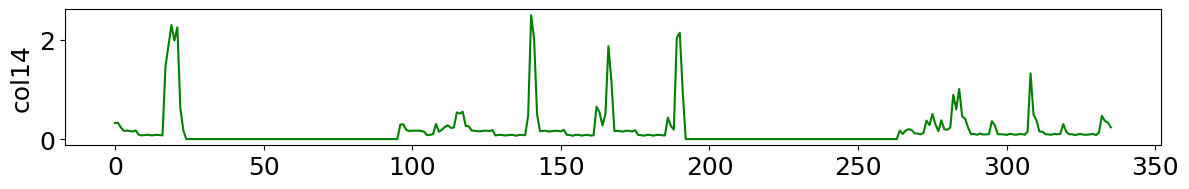

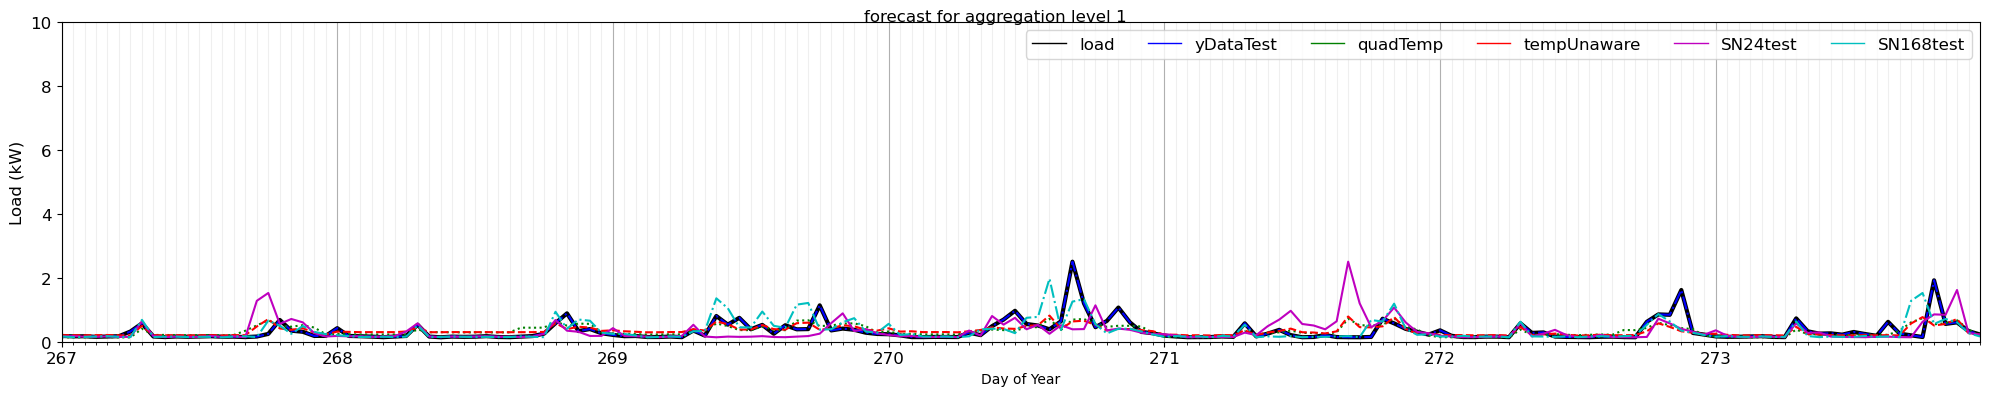

In [57]:
# Run CONFIG1 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig1'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG1*** results
root='../project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


In [123]:
# Config #2 for MLR: just update variables changed since config1

# [t-24,t-25,t-26,t-168] (10 DoW terms) + [temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
# - also returns UNAWARE version (just the DoW load terms)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 12   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 10    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,25,26,168]   #lags= [24,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG2 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig2'

resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG2*** results
root='../project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


In [139]:
# Config #3 for MLR: just update variables changed since config2

# [t-24,t-168] (6 DoW load terms)+[temperature] + [dayLight] 
#(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
# Unaware model is same as 1)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab
#aggregation_N = [100]


nEnvTerms = 18   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 6    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [140]:
# use same aggregation groups as for ANN config2
pathNameIRL = '../project_data/intermediateDataIreland/IRL_ANN_config2run6_ALLincl1_Normalised_HL2_Nodes20_Epochs100_BatchSize32_nFeat6/'
inputFile = str(pathNameIRL) + 'grpAggLoad_N_dict.pickle'
with open(inputFile, 'rb') as pickleFile:
    grpAggLoad_N_dictIRL = pickle.load(pickleFile, encoding='latin-1')
#grpAggLoad_N_dictIRL

regression coeffs - QUADRATIC model :
Regression Model coefficients: 
 [ 3.30293985e-03  1.60229142e-04 -3.53246800e-01  7.24886773e-03
 -3.25302787e-04 -2.12728263e-01 -8.75099039e-04  1.06454303e-04
  5.27598776e-02 -1.22233600e-03  1.55058719e-05  1.62833615e-01
  1.88369036e-02 -1.30562963e-03 -2.82798764e-01 -8.20553436e-02
  2.62408918e-03  2.82798764e-01  1.05946205e-03 -1.05946205e-03
  9.56702025e-02  1.27281885e-01  1.35950981e-01  1.21141213e-01]
Regression Model Intercept: 0.8963372438627981
R2 coefficient:  0.3331410293962833
regression coeffs - UNAWARE model:
Regression Model coefficients: 
 [ 1.63885930e-04 -1.63885930e-04  2.67715746e-01  2.97585919e-01
  3.12701073e-01  2.87552060e-01]
Regression Model Intercept: 0.2886291006919931
R2 coefficient:  0.23447855744242851
For N 1,grp0,MapesFC:[0.31803174 0.388459   0.4023379  0.38899815],MapesTrain:[0.33435092 0.39529478 0.3965857  0.39770325]
For N 1,grp1,MapesFC:[0.58721367 0.66457284 0.59678012 0.60299807],MapesTrain:[1

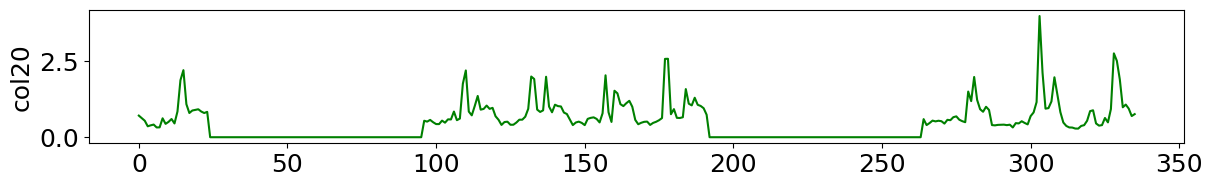

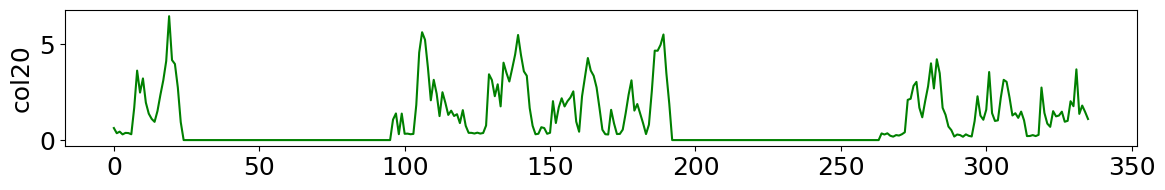

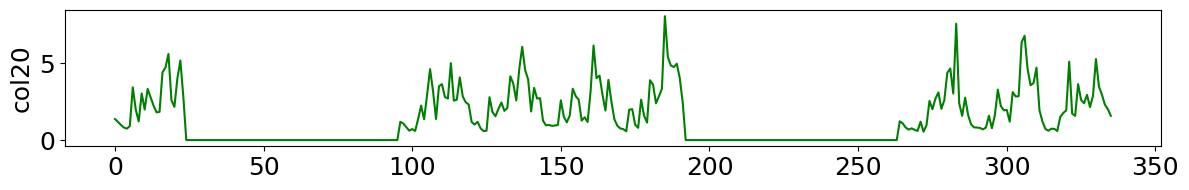

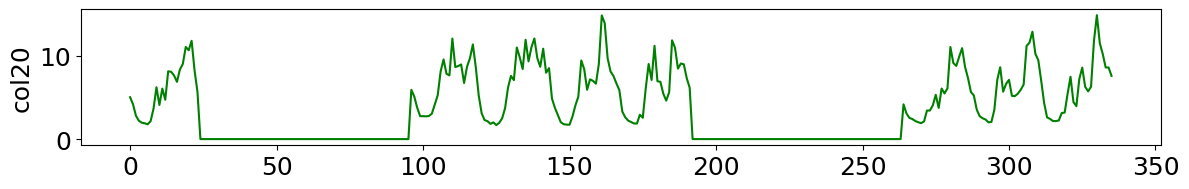

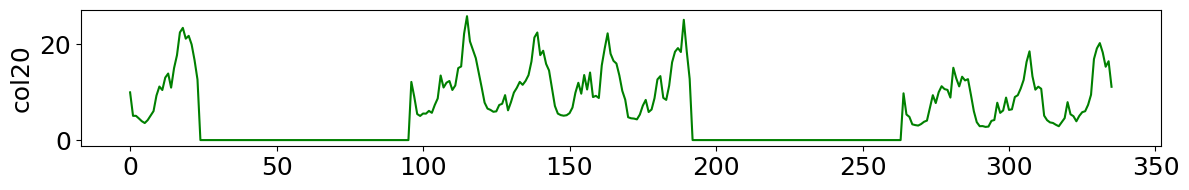

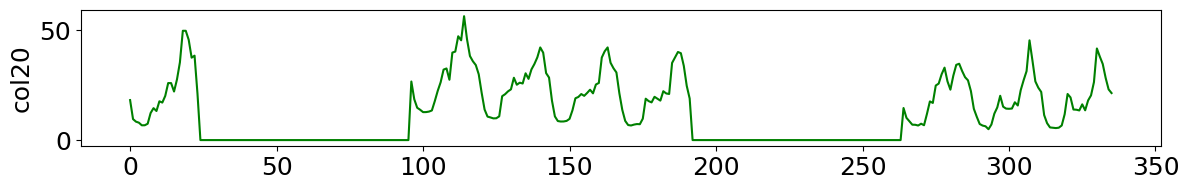

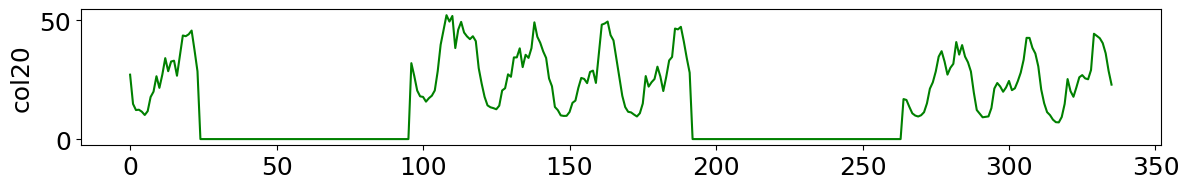

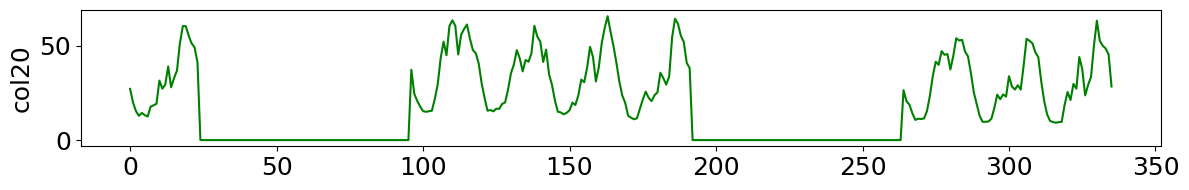

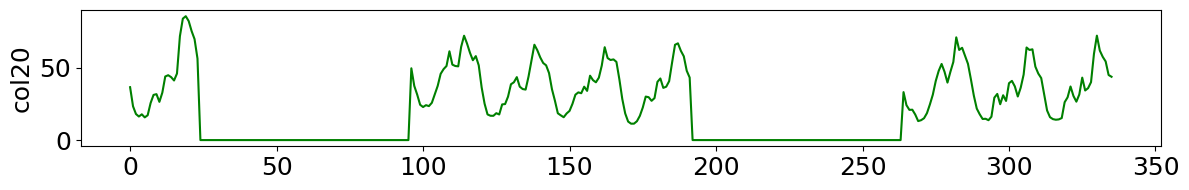

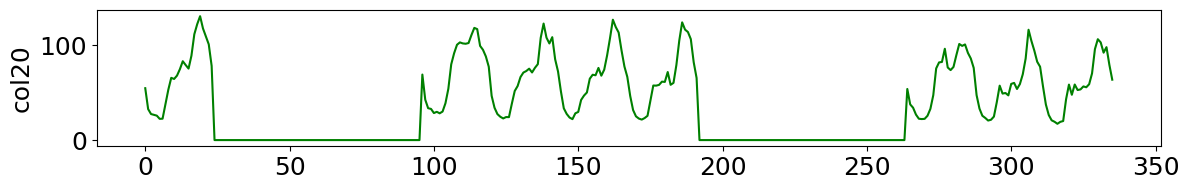

In [141]:
# Run CONFIG3 MLR
errorsAgg,mlrTestPredict_dict,grpAggLoad_N_dict = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles,grpAggFile=grpAggLoad_N_dictIRL)
config='MLRconfig3'
resultsDictionaries={'errorsAgg_dict':errorsAgg,'mlrTestPredict_dict':mlrTestPredict_dict,'grpAggLoad_N_dict':grpAggLoad_N_dict}

# save ***CONFIG3*** results
root='../project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


In [ ]:
# Config #4 for MLR: just update variables changed since config3

# [t-24,t-25,t-26,t-168] (10 DoW load terms)+[temperature] + [dayLight] 
#(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
# Unaware model is same as 2)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 18   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 10    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,25,26,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG4 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig4'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG4*** results
root='../project_data/intermediateDataIreland/'
globPrefix='IRL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


# Read in  MLR runs and plot errors

In [18]:
#aggregation_N = [5,10,20,30,40,50,75,100]  # set aggregation levels as used 
aggregation_N = [1,3,5,10,20,30,40,50,75,100] 

# make categorical axis categories for swarmplots
order = [str(n) for n in aggregation_N]

For each configuration run:
1. retrieve error dictionary
2. flip dictionary nestings
3. get error percentiles
4. plot boxplot/swarm plot
5. Add percentiles to plot (optional)
6. Repeat for eache errror type? 

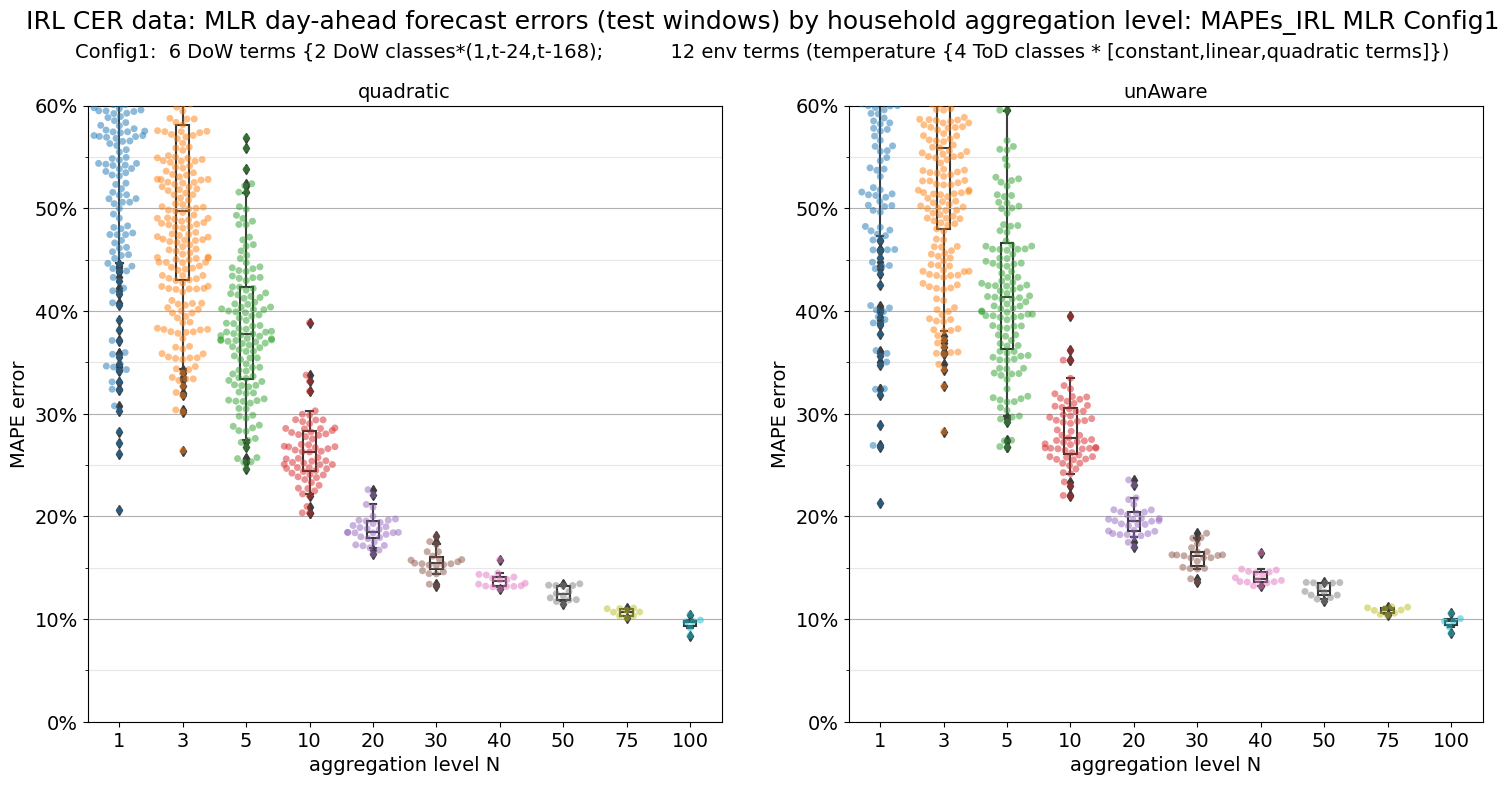

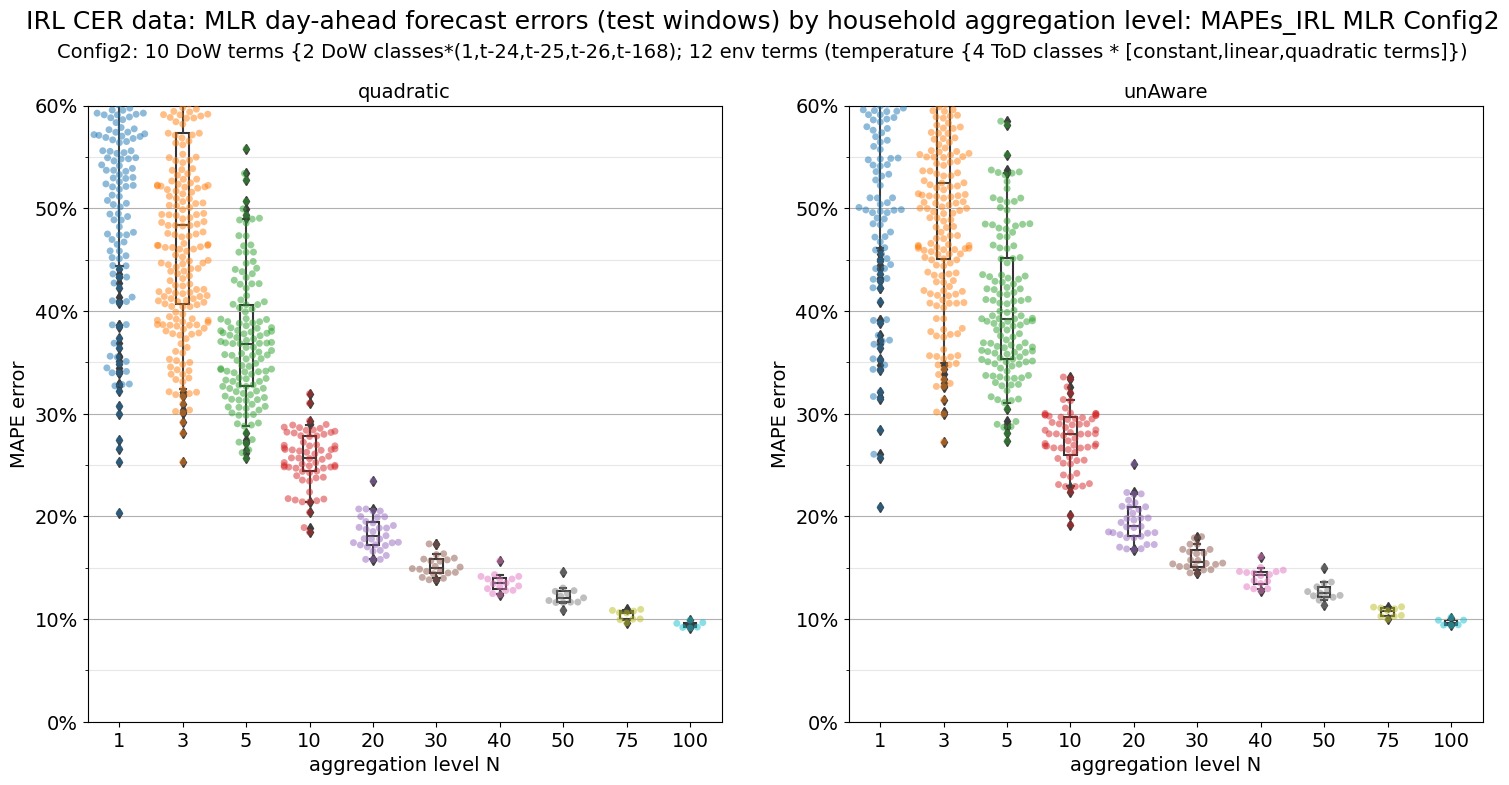

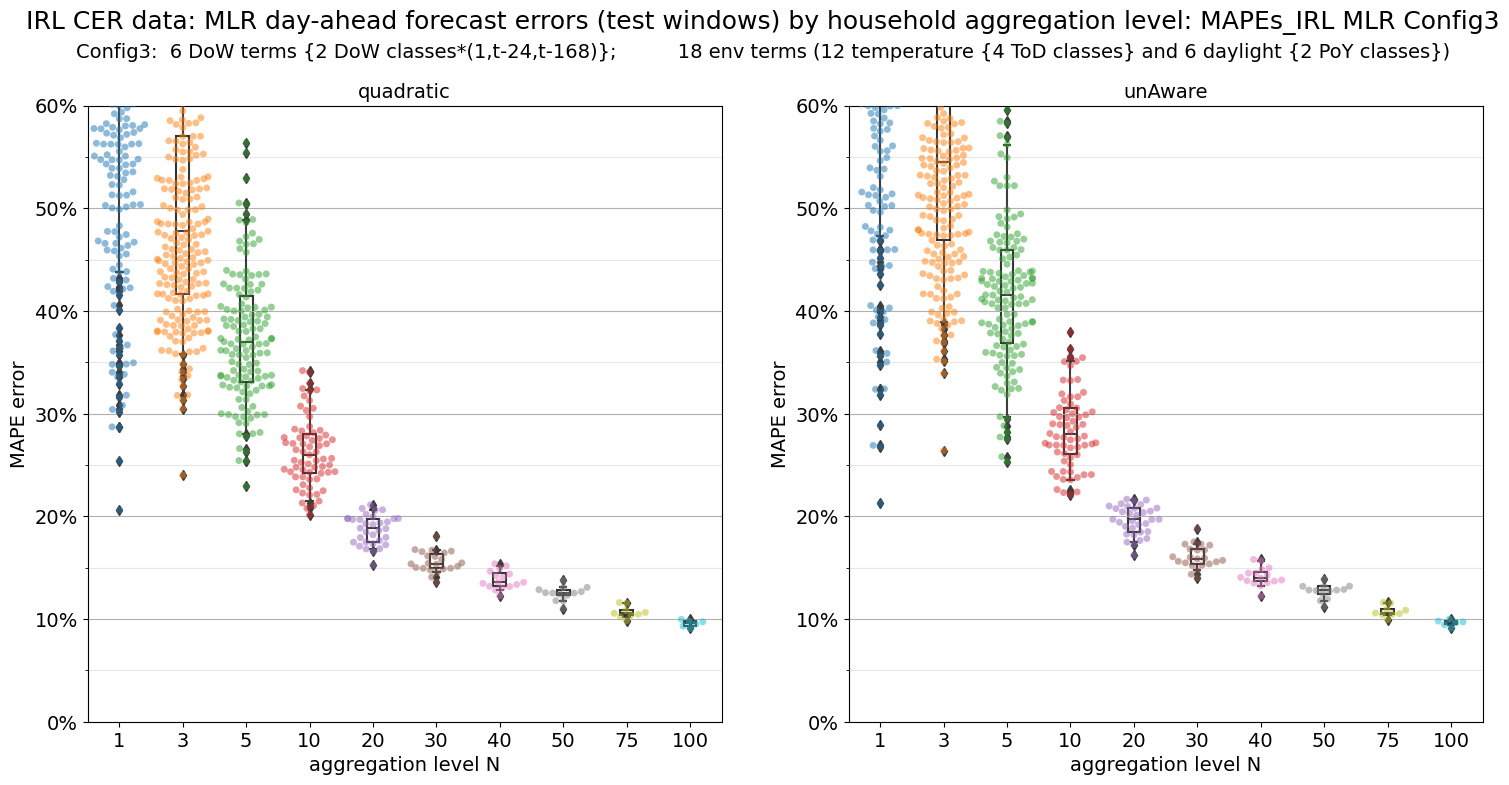

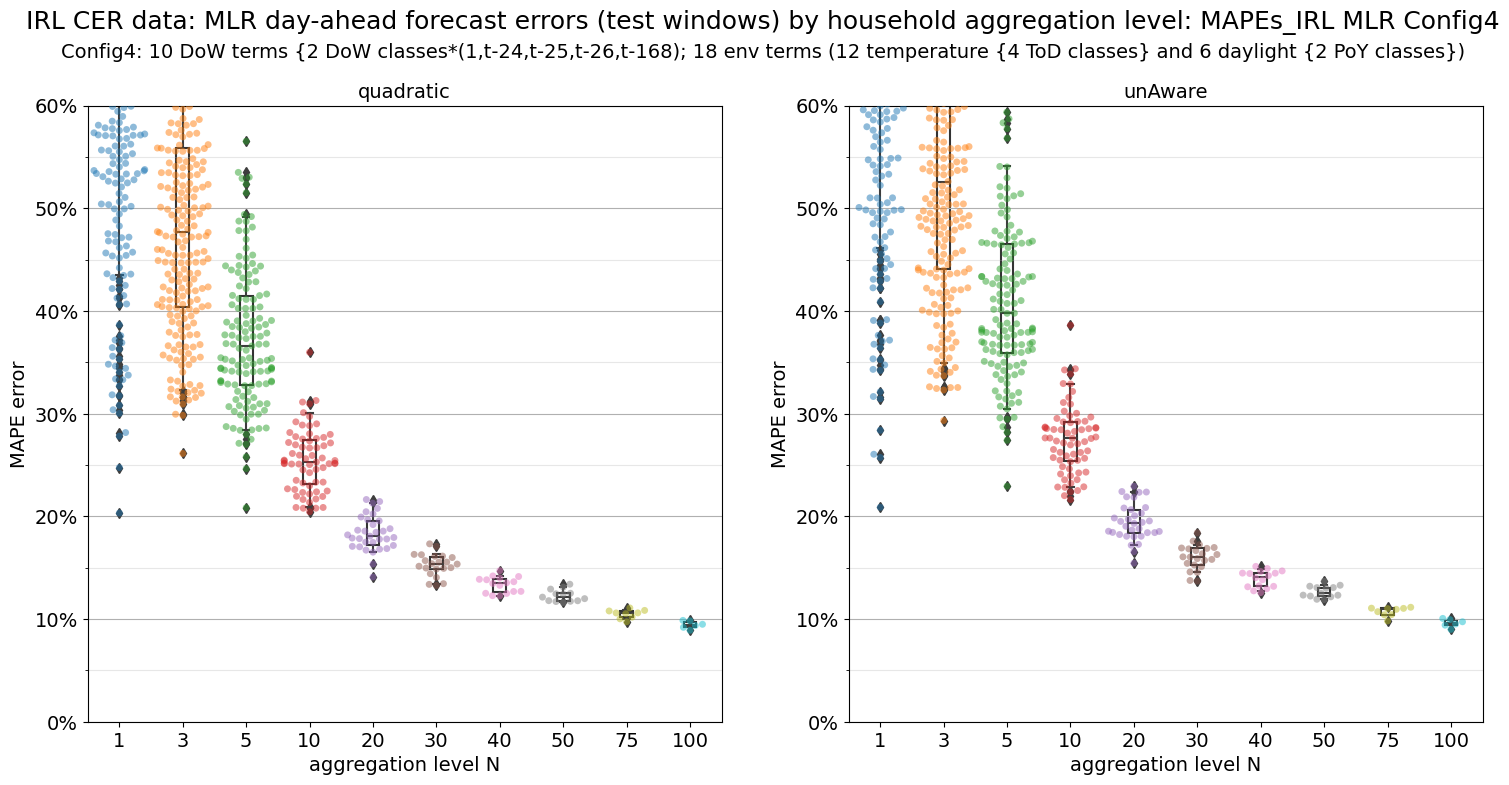

In [19]:
# Plot IRL MLR results

# set filenames,paths,plot titles etc to use:
figTitleBase = 'IRL CER data: MLR day-ahead forecast errors (test windows) by household aggregation level: '
figSaveBase = '../IRL CER MLR errors (test windows) swarm plot'

#set config strings and pathNames again IN CASE wish to change
configStrings = ['IRL MLR Config1','IRL MLR Config2','IRL MLR Config3','IRL MLR Config4']
#configStrings = ['IRL MLR Config1 old','IRL MLR Config2 old','IRL MLR Config3 old','IRL MLR Config4 old']+['IRL MLR Config1','IRL MLR Config2','IRL MLR Config3','IRL MLR Config4']

subTitleBases = [\
    'Config1:  6 DoW terms {2 DoW classes*(1,t-24,t-168);           12 env terms (temperature {4 ToD classes * [constant,linear,quadratic terms]})',\
    'Config2: 10 DoW terms {2 DoW classes*(1,t-24,t-25,t-26,t-168); 12 env terms (temperature {4 ToD classes * [constant,linear,quadratic terms]})',\
    'Config3:  6 DoW terms {2 DoW classes*(1,t-24,t-168)};          18 env terms (12 temperature {4 ToD classes} and 6 daylight {2 PoY classes})',\
    'Config4: 10 DoW terms {2 DoW classes*(1,t-24,t-25,t-26,t-168); 18 env terms (12 temperature {4 ToD classes} and 6 daylight {2 PoY classes})']

#agg levels 1 to 100
pathNames = [\
'../project_data/intermediateDataIreland/IRL_MLR_MLRconfig1run1_ALLincl1_12envTerms_6DoWterms/',
'../project_data/intermediateDataIreland/IRL_MLR_MLRconfig2run2_ALLincl1_12envTerms_10DoWterms/',
'../project_data/intermediateDataIreland/IRL_MLR_MLRconfig3run3_ALLincl1_18envTerms_6DoWterms/',
'../project_data/intermediateDataIreland/IRL_MLR_MLRconfig4run4_ALLincl1_18envTerms_10DoWterms/']

for configString,subTitleBase,pathName in zip(configStrings,subTitleBases,pathNames):

    #retrieve errors dictionaries
    errorsAgg = get_MLRerrorDictionary(pathName)

    #flip nesting to facilitate plotting
    errorsAgg_flipped      = flip_dictionary(errorsAgg)

    #calculate percentiles : 'quadratic' etc are df row index (model) names 
    df_percentilesQuadratic = get_error_percentiles(errorsAgg_flipped, 'quadratic',percentiles=[5,25,50,75,95])
    percentilesDict = {'percentiles':df_percentilesQuadratic}
    percentilesOutFile = pathName+'percentilesDict.pickle'
    with open(percentilesOutFile, 'wb') as f:
        pickle.dump(percentilesDict, f, protocol=pickle.HIGHEST_PROTOCOL)

    # now plot MAPE errors in one figure
    for errorType in ['MAPEs']:        # ['MCVs','MRMSEs']
        figTitle =figTitleBase +str(errorType)+'_'+ configString
        figSave  = pathName + figSaveBase + str(errorType) +'_'+ configString  
        sbn_plotErrors_V2(errorsAgg_flipped[errorType],order,figTitle=figTitle,figSave=figSave,\
                         subTitle=subTitleBase,errorType='MAPE',dropFromPlot=['SN24test','SN168test'])
        

see LCL_ANN noteboook for comparison plots

# R2 persistance model  - not used for Ireland case

In [105]:
# Test persistDataArrayVersion2 function - check dimensions same as v1 

lDataTtoF = persistDataArrayVersion2(aggLoad,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
print(lDataTtoF.shape)
lDataStoM = persistDataArrayVersion2(aggLoad,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
print(lDataStoM.shape)
lDataStoM_7d = persistDataArrayVersion2(aggLoad,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)
print(lDataStoM_7d.shape)

NameError: name 'persistDataArrayVersion2' is not defined

In [ ]:
# plot output of persistDataArrayVersion2 function to verify working as expect ie do the plots look identical to those in IRL4 script.
peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle='Persistance Models - Aggregate Data')

*inputs for regression and r2 calculation :
1) feature np array e.g. t-24 hourly or daily load series
2) target np array e.g. t hourly or daily load series
Run on a) Aggregate b) Individual users
*

In [ ]:
# this is just a test of method
# Get r2 for aggregate HOURLY load split by weekday, weekends etc and PLOT DATA

# assign independent var (features),xs and dependent var (target) ys
xs=lDataTtoF[0]
ys=lDataTtoF[1]
r2,mse = lrmodel_r2(xs,ys,plot='y',print='y',cl='k',inputFigObject='None')
print("r2: ",r2,"mean sq error: ",mse)


In [ ]:
# test for aggregate case for each DoW class
fig = plt.figure(figsize=(12,4))  # create empty fig object on which to append subplots

print("Aggregate Load T_to_F 24h persistance model R2: ",r2_get(lDataTtoF,plot='y',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle='TtoF'))
print("Aggregate Load S_to_M 24h persistance model R2: ",r2_get(lDataStoM,plot='y',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle='StoM'))
print("Aggregate Load S_to_M 168h persistance model R2: ",r2_get(lDataStoM_7d,plot='y',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle='StoM 168h'))


In [ ]:
# first, get uID list
uIDs=hourly_df.index.values
len(uIDs)
print(type(uIDs[0]))
uIDs

In [ ]:
hourly_df

In [ ]:
# Loop thro uIDs and calc r2 for each uID :
# compute 3 r2 values for each uID: TtoF,StoM (t-24) model and StoM (t-168) model

r2List_TtoF=[]
r2List_StoM=[]
r2List_StoM_7d=[]

for uID in uIDs:
    uID_load  = hourly_df.loc[uID]      
    #print(type(uID_load))
    #print(uID_load.shape)
    #print(uID)

    lDataTtoF = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
    #print(lDataTtoF.shape)
    lDataStoM = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
    #print(lDataStoM.shape)
    lDataStoM_7d = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)
    #print(lDataStoM_7d.shape)
    
    r2 = r2_get(lDataTtoF,plot='n',print='n',cl='k') 
    #print("r2 (TtoF data): ",r2,"mean sq error (TtoF data): ",mse)
    r2List_TtoF.append([r2])

    r2 = r2_get(lDataStoM,plot='n',print='n',cl='b')  
    #print("r2 (StoM data): ",r2,"mean sq error (StoM data): ",mse)
    r2List_StoM.append([r2])
    
    r2 = r2_get(lDataStoM_7d,plot='n',print='n',cl='b')  
    #print("r2 (StoM 7 day persistance data): ",r2,"mean sq error (StoM 7 day persistance data): ",mse)
    r2List_StoM_7d.append([r2])

#r2TtoF_df = pd.DataFrame(r2List_TtoF,columns=['meterID','r2'])
#r2StoM_df = pd.DataFrame(r2List_StoM,columns=['meterID','r2'])
#r2StoM7d_df = pd.DataFrame(r2List_StoM_7d,columns=['meterID','r2'])

# instead write all 3 r2 lists to a single dataFrame
r2uIDs_df=pd.DataFrame(np.column_stack([uIDs,r2List_TtoF,r2List_StoM,r2List_StoM_7d]),\
                       columns=['uID','r2_TtoF','r2_StoM','r2_StoM_7d'])
r2uIDs_df

In [ ]:
r2uIDs_df['uID'] = r2uIDs_df['uID'].astype(int)
r2uIDs_df

In [ ]:
# check output 
r2Vals = r2uIDs_df['r2_TtoF'].values
print(len(r2Vals),type(r2Vals))
print(r2Vals)

r2uIDs_df = r2uIDs_df.set_index('uID')
r2uIDs_df


In [ ]:
r2_histogram(r2uIDs_df,pltTitle='')

** Now use different window widths to extract optimal persistance model xs,ys pairs: **

Process for estimating predictability of user based on perisistance model window size
Loop through window widths from 0 (+/-0 1hr) to 24 (+/-12) hrs where for each:

Construct input data array containing xs,ys series (for TtoF,StoM, StoM-7d models); function: persistDataWindowed
Compute r2 values for uIDs or Aggregate for same models; function: get_r2

In [ ]:
# first run for Aggregate load case : calculate R2 for a series of window widths ranging from 0 (default) to +/- 12hr

pdLoadSeries=aggLoad
smplsPerDay=24
nDays=365
titles=['Load Tues to Fri - 24h lag','Load Sat to Mon - 24h lag','Load Sat to Mon - 168h lag']
r2_vals=[]
r2_TtoF=[]
r2_StoM=[]
r2_StoM_7d=[]

df_r2_TtoF=pd.DataFrame()
df_r2_StoM=pd.DataFrame()
df_r2_StoM_7d=pd.DataFrame()
DoW_dfs_dict = {'TtoF':df_r2_TtoF,'StoM':df_r2_StoM,'StoM_7d':df_r2_StoM_7d}


for w in [0,1,2,3,4,5,6,12]:
    
    # get load series for each DoW class
    lDataTtoF_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
    lDataStoM_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
    lDataStoM_7d_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
    fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

    # get R2 value for each DoW class
    r2a = r2_get(lDataTtoF_W,plot='y',print='n',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle=titles[0]) 
    r2b = r2_get(lDataStoM_W,plot='y',print='n',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle=titles[1]) 
    r2c = r2_get(lDataStoM_7d_W,plot='y',print='n',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle=titles[2])
    #DoW_r2_dict = ['TtoF':r2_TtoF,'StoM':r2_StoM,'StoM_7d':r2_StoM_7d]
    
    r2_TtoF.append([r2a])
    r2_StoM.append([r2b])
    r2_StoM_7d.append([r2c])
                      
    r2_vals.append([r2a,r2b,r2c])

    fig.suptitle('Linear Regression - Persistance Models: Lag Window' + str(w)+' hr')         

    fig.tight_layout()
    fig.subplots_adjust(top=0.83)
    
fname = './Figures.Ireland/Aggregate Persistance Models - linear regression for suite of window bin widths.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')  

#print("r2_TtoF: \n",r2_TtoF)
#print(pd.DataFrame(r2_TtoF))

df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF)],axis=1)
df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM)],axis=1)
df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d)],axis=1)
df_r2_TtoF


In [ ]:
# Plot R2 vals from aggregate case above

fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(211)

x=np.arange(1,4,1)
cl=['k','b','g','r','m','y','c','grey']

for i in range(len(r2_vals)):
    ax1.plot(x,r2_vals[i],color=cl[i])
    ax1.scatter(x,r2_vals[i],color=cl[i])

ax1.set_xticks(x)
ax1.set_xticklabels(['TtoF 24h', 'StoM 24h', 'StoM 168h'])
ax1.set_xlabel('Persistence Models', fontsize=12)
ax1.set_ylabel('R" Values')
ax1.set_ylim([0.8,1])

ax1.set_title('R2 Values for Persistance Models ')
ax1.grid(axis='y')

In [ ]:
# now run for individual uIDs 

uIDs=hourly_df.index.values
len(uIDs)
uIDs

In [ ]:
# firstly: run TEST for small subset of uID, windowHW to plot results and check working , estimate time required etc
uIDs_test=uIDs[0:2]

** Loop thro uIDs and calc r2 for each uID : compute 3 r2 values for each uID: TtoF,StoM (t-24) model and StoM (t-168) model**

In [ ]:
smplsPerDay=24
nDays=365
titles=['Load Tues to Fri - 24h lag','Load Sat to Mon - 24h lag','Load Sat to Mon - 168h lag']

#windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
windows=[0,1,2]

# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']
DoWclasses=['uID]']  #not a typo!

for w in windows:
    a=str(colBaseNames[0])+str(w)
    b=str(colBaseNames[1])+str(w)
    c=str(colBaseNames[2])+str(w)
    colNames.extend([a,b,c])
    a=str(colBaseNames[0])
    b=str(colBaseNames[1])
    c=str(colBaseNames[2])
    DoWclasses.extend([a,b,c])    
    
#print("column names: ",colNames) 
#print("DoWclasses: ",DoWclasses)

#r2List_uIDs=[]    # list to hold all R2 values

#initialize dataframes to hold uID r2 values
df_r2_TtoF=pd.DataFrame()
df_r2_StoM=pd.DataFrame()
df_r2_StoM_7d=pd.DataFrame()

for uID in uIDs_test:
    uID_load  = hourly_df.loc[uID]      
    print(uID)
    
    #initialize lists to hold r2 for each window value
    r2_TtoF=[]
    r2_StoM=[]
    r2_StoM_7d=[]
    r2_vals=[uID]  # all r2 combined (ie all DoW classes and window sizes)

    # now for uID, loop through window range 
    for w in windows:
        %time lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
        lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
        lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
        fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

        r2a = r2_get(lDataTtoF_W,plot='y',print='n',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle=titles[0]) 
        r2b = r2_get(lDataStoM_W,plot='y',print='n',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle=titles[1]) 
        r2c = r2_get(lDataStoM_7d_W,plot='y',print='n',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle=titles[2])

        r2_TtoF.append([r2a])
        r2_StoM.append([r2b])
        r2_StoM_7d.append([r2c])
                      
        r2_vals.append([r2a,r2b,r2c])
        #r2_vals.extend([r2_TtoF,r2_StoM,r2_StoM_7d]) # grouping r2 values by 3 dayclasses

        fig.suptitle('uID: '+str(uID)+'  Persistance Models, Lag Window: ' + str(w)+' hr',fontsize=15)         

        fig.tight_layout()
        fig.subplots_adjust(top=0.83)
    
    print("R2 Values for uID:",uID,"for window HW in ",windows,"are :",r2_vals)
    #r2List_uIDs.append(r2_vals)   # iteratvely append list of R2 values for current uID

    df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF,columns=[uID])],axis=1)
    df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM,columns=[uID])],axis=1)
    df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d,columns=[uID])],axis=1)
    
for df in [df_r2_TtoF,df_r2_StoM,df_r2_StoM_7d]:
    df.index = windows


DoW_dfs_dict = {'TtoF':df_r2_TtoF,'StoM':df_r2_StoM,'StoM_7d':df_r2_StoM_7d}
DoW_dfs_dict

** Next bit takes > 6 hrs to run **

In [ ]:
# now run for all uIDs without plotting
smplsPerDay=24
nDays=365

#windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
windows=[0,1,2]

# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']

for w in windows:      # create column names for o/p dataframe
    a=str(colBaseNames[0])+str(w)
    b=str(colBaseNames[1])+str(w)
    c=str(colBaseNames[2])+str(w)
    colNames.extend([a,b,c])
    
r2List_uIDs=[]    # list to hold all R2 values

for uID in uIDs_test:                        # or for Grp in [grp,0,grp1,grp2...] for aggregation level test
    start_time = time.time()
    
    uID_load  = hourly_df.loc[uID]      # selevct load data (eg individual or aggregate of N households)

    
    # now for uID, loop through window range 
    for w in windows:
        lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
        lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
        lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
        #fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

        r2_TtoF = r2_get(lDataTtoF_W) 
        r2_StoM = r2_get(lDataStoM_W) 
        r2_StoM_7d = r2_get(lDataStoM_7d_W)
        #print(r2_TtoF,type(r2_TtoF))
        
        r2_TtoF.append([r2a])     
        r2_StoM.append([r2b])
        r2_StoM_7d.append([r2c])
                      
        r2_vals.append([r2a,r2b,r2c])

        
        
        
        
        r2_vals.extend([r2_TtoF,r2_StoM,r2_StoM_7d])  # add 3 sets of R2 values to list (row)
        # calculate execution time and print
 
    r2List_uIDs.append(r2_vals)   # iteratvely append list of R2 values for current uID
    print("uID: ",uID,"--- %s seconds ---" % (time.time() - start_time)) 


r2uIDsW_df = pd.DataFrame(r2List_uIDs,columns = colNames)
r2uIDsW_df = r2uIDsW_df.set_index('uID')
r2uIDsW_df


In [ ]:
#r2uIDsW_df.to_csv('../MScProjectCoding/project_data/intermediateDataIreland/r2uIDsW_df.csv')
r2uIDsW_df.to_pickle('../MScProjectCoding/project_data/intermediateDataIreland/CER3_r2uIDsW_df.pkl')

In [ ]:
r2_histogram(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',SaveFigTitle='Persistence Models - R2 multi-window Histogram')

In [ ]:
# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
DoWclasses=['uID]']

for w in windows:
    a=str(colBaseNames[0])
    b=str(colBaseNames[1])
    c=str(colBaseNames[2])
    DoWclasses.extend([a,b,c])    
DoWclasses

In [ ]:
# get median and mean R2 values for each a) day class b) window width
#print(r2uIDsW_df.mean(axis = 0))
r2Medians = np.asarray(r2uIDsW_df.median(axis = 0)).reshape(-1,3).tolist()
r2Means = np.asarray(r2uIDsW_df.mean(axis = 0)).reshape(-1,3).tolist()

len(r2Means)
r2Means

In [ ]:
# Plot R2 vals means and medians for aggregate case above

#fig = plt.figure(figsize=(18,20))
fig = plt.figure(figsize=(25,15))
#ax1 = fig.add_subplot(111)

windows=[0,1,2,3,4,5,6,12] 
x=np.arange(1,4,1)
cl=['k','b','g','r','m','y','c','grey']
titles=['r2Means','r2Medians']
for i,list in enumerate([r2Means,r2Medians]):
    ax1 = fig.add_subplot(2,1,i+1)
    for j in range(len(r2Means)):
        ax1.plot(list[j],x,color=cl[j],label=windows[j])
        ax1.scatter(list[j],x,color=cl[j])

    ax1.set_yticks(x)
    ax1.set_yticklabels(['TtoF 24h', 'StoM 24h', 'StoM 168h'])
    ax1.set_ylabel('Persistence Models', fontsize=12)
    ax1.set_xlabel('R" Values')
    ax1.set_xlim([0.0,1])
    ax1.legend()

    ax1.set_title('R2 Values for Persistance Models:'+str(titles[i]))
    ax1.grid(axis='x')


In [ ]:
r2_histogram(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',SaveFigTitle='Persistence Models - R2 multi-window Histogram')

In [ ]:
r2_histogramV2(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',\
               SaveFigTitle='Persistence Models R2 multi-window Histogram Greyscale')

# Now run persistDataWindowed on subsets of size N users:
#output: = df of R2 values of dimensions #grps × 24 for each N , takes about 4 hrs to run

In [67]:
r2Agg = {}  # create empty dictionary to hold set of dataframes with R2 stats for each aggregation level

aggregation_N = [3,6,12,25,50,75,100]   # just short of 7 hrs to run this config
#aggregation_N = [350]  # for testing

smplsPerDay=24
nDays=365

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
#windows=[0,1,2]   # testing

# set output dataframe column names
colBaseNames=['r2_TtoF','r2_StoM','r2_StoM7d']
colNames=['uID']

#for w in windows:      # create column names for o/p dataframe
#    a=str(colBaseNames[0])
#    b=str(colBaseNames[1])
#    c=str(colBaseNames[2])
#    colNames.extend([a,b,c])
#    for i in range(len(colBaseNames)):
#        windowsCol.append(w)
    
for N in aggregation_N:

    # Run 'out of sample' selection of random user subsets of size N
    df_randIDgrps_N = randomUserGroups(hourly_df,N)

    # loop through randID groups and get aggregate load series for each
    df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)
    
    #initialize dataframes to hold uID r2 values for N
    df_r2_TtoF=pd.DataFrame()
    df_r2_StoM=pd.DataFrame()
    df_r2_StoM_7d=pd.DataFrame()
    
    #Loop through each aggregate group of size N
    for i,uID in  enumerate(df_grpAggLoad_N.columns):     #col in [grp,0,grp1,grp2...etc] for each N
        start_time = time.time()

        #uID_load  = hourly_df.loc[uID]   
        uID_load = df_grpAggLoad_N[uID]      # select load data (eg individual or aggregate of N households)

        #initialize lists to hold r2 for each window value
        r2_TtoF=[]
        r2_StoM=[]
        r2_StoM_7d=[]

        # now for grp/uID, loop through window range 
        for w in windows:
            lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
            lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
            lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
            #fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

            r2a = r2_get(lDataTtoF_W) 
            r2b = r2_get(lDataStoM_W) 
            r2c = r2_get(lDataStoM_7d_W)
            
            r2_TtoF.append([r2a])
            r2_StoM.append([r2b])
            r2_StoM_7d.append([r2c])
            
        print("For aggregation level N:",N,"Grp/uID: ",uID,"-- %s seconds --" % (time.time() - start_time),"time --%s--" % time.asctime()) 

        df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF,columns=[uID])],axis=1)
        df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM,columns=[uID])],axis=1)
        df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d,columns=[uID])],axis=1)
    
    for df in [df_r2_TtoF,df_r2_StoM,df_r2_StoM_7d]:
        df.index = windows
              
    d={}
    d['TtoF'] = df_r2_TtoF
    d['StoM'] =  df_r2_StoM
    d['StoM_7d'] = df_r2_StoM_7d
         
    r2Agg['%d' % (N)] = d

NameError: name 'linear_model' is not defined

In [ ]:
#save to pickle !
with open('../MScProjectCoding/project_data/intermediateDataIreland/r2Agg_IRL.pickle', 'wb') as f:
    pickle.dump(r2Agg, f, protocol=pickle.HIGHEST_PROTOCOL)
r2Agg

In [ ]:
# read pickled dictionary
with open('../MScProjectCoding/project_data/intermediateDataIreland/r2Agg_IRL.pickle', 'rb') as pickleFile:
    r2Agg = pickle.load(pickleFile, encoding='latin-1') 
    
r2Agg

In [ ]:
# flip r2Agg dictionary nest levels for dataframe, plotting, etc

from collections import defaultdict
import pprint

r2Agg_flipped = defaultdict(dict)

for key, val in r2Agg.items():
    #print("key: ",key,"val type: ",type(val))
    for subkey, subval in val.items():
        #print("subkey: ",subkey,"subval type: ",type(subval),"\n subval: \n",subval)
        r2Agg_flipped[subkey][key] = subval
        
dict(r2Agg_flipped)['TtoF']

In [ ]:
# create multilevel column names
colIdxLev1 = [['TtoF']*len(aggregation_N),['StoM']*len(aggregation_N),['StoM_7d']*len(aggregation_N)]
colIdxLev1 = [item for sublist in colIdxLev1 for item in sublist]
colIdxLev2 = [n for n in aggregation_N]*3
column_index = [colIdxLev1,colIdxLev2]
column_index

In [ ]:
# create dataframe of R2 vals for all aggregation levels and DoW classes

# currently calculating MEAN , could also compute MEDIAN of R2 values

r2Agg_Avgs_df = pd.DataFrame()

for k,v in dict(r2Agg_flipped).items():
    #print("key:",k)
    for subk,subv in v.items():
        #print(subk,subv.mean(axis=1))
        r2Agg_Avgs_df = pd.concat([r2Agg_Avgs_df,pd.DataFrame(subv.mean(axis=1))],axis=1)

r2Agg_Avgs_df.columns=column_index
r2Agg_Avgs_df


In [ ]:
fig= plt.figure(figsize=(18,6))

for i,DoWclass in enumerate(['TtoF','StoM','StoM_7d']):
    ax1 = fig.add_subplot(1,3,i+1)
    #print(i,DoWclass)
    #plt.subplot(1,3,i+1)
    ax1 = sns.heatmap(r2Agg_Avgs_df[DoWclass], cmap="coolwarm_r",annot=True,fmt=".2f",linewidths=.5, robust=True)
    ax1.set_title('Day Class: '+str(DoWclass), fontsize=18)
    ax1.set_xlabel('Number of users', fontsize=16)
    ax1.set_ylabel('Window half width (hrs)', fontsize=16)
    #ax1.set_xscale('log') # doesn't work
    
# Add a title to the Figure
fig.suptitle('R2 measure for each Day Class as function of household aggregation level\
N and window search half width w hrs', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.83)

fname = './Figures.Ireland/'+'IRL_R2_heatmap.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')
